In [1]:
import anndata as ad
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
import seaborn as sns
import pandas as pd
import os

import pandas as pd
import os
from glob import glob
import numpy as np
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

import gseapy
from gseapy import dotplot, barplot
import matplotlib.colors
from matplotlib import lines
from pydeseq2.dds import DeseqDataSet
# from pydeseq2.DeseqDataSet import DeseqDataSet
# from bioinfokit import analys, visuz
from pydeseq2.ds import DeseqStats
# from pydeseq2.DeseqStats import DeseqStats
from statsmodels.stats.multitest import multipletests 
import numpy as np
import scanpy as sc
from scipy.stats import linregress
path = "/home/eloiseb/stanford_drive/data/RNAseq/RNA/Bulk_rna/Combined/"
pathdata="/home/eloiseb/data/rna/bulk/"
pathdata="/home/eloiseb/stanford_drive/data/rna/"
PALETTE = {"AST": "#8aafa9", 
           'EXC-L23':"#ead1dc",
           'EXC-L4':"#c27ba0",
           'EXC-L5':"#741b47",
            'EXC-L6':"#d9d2e9",
           "EXC-IT":"#c27ba0",
           "EXC-L6-spe":"#d9d2e9",
           "EXC-L6_spe":"#d9d2e9",
                "EXC-L6":"#d9d2e9",
           
           'EXC':"#d9d2e9",
           "INH-CGE":"#f34c0d",
           "INH":"#f34c0d",
           "INH-MGE":"#FCDBCE",
            "MIC":"#165f54",
           # "ENDO-Mural":"#ab910b",
           "Endo":"#ab910b",
           "VLMC":"#fbf0ba",
           "Endo-Mural":"#ab910b",
           "OLD":"#ffc281",
           "OPC":"#7f6140"
          }

palette_exp= {
               "resilience": "#7CAFC4", #"#2b303a",
               "resistance":"#576169", #"#92dce5",
    "AD":#"#BFAE48"
    "#88352b",
        }
import scanpy as sc

In [2]:
metadata = pd.read_csv("/remote/home/eloiseb/data/rna/bulk_harmoni_rosmap_mayo_msbb_metadata.csv")
metadata[~metadata.thal.isna()]

,Unnamed: 0,specimenID,individualID,tissue,BrodmannArea,assay,isPostMortem,RIN,msex,educ,...,RIN2,apoe4_allele,sex,Study,thal,tissue_y,ethnicity,CDR,plaqueMean,ethnicity_y
3026,0,mayo_cbe_1000_CER,1000,cerebellum,NaN,rnaSeq,NaN,8.4,NaN,NaN,...,70.56,1.0,female,MAYO,5.0,CBE,NaN,NaN,NaN,NaN
3027,1,mayo_cbe_1010_CER,1010,cerebellum,NaN,rnaSeq,NaN,8.6,NaN,NaN,...,73.96,0.0,male,MAYO,5.0,CBE,NaN,NaN,NaN,NaN
3028,2,mayo_cbe_1015_CER,1015,cerebellum,NaN,rnaSeq,NaN,9.0,NaN,NaN,...,81.00,1.0,male,MAYO,5.0,CBE,NaN,NaN,NaN,NaN
3029,3,mayo_cbe_1019_CER,1019,cerebellum,NaN,rnaSeq,NaN,8.3,NaN,NaN,...,68.89,1.0,female,MAYO,5.0,CBE,NaN,NaN,NaN,NaN
3030,4,mayo_cbe_1027_CER,1027,cerebellum,NaN,rnaSeq,NaN,9.1,NaN,NaN,...,82.81,0.0,male,MAYO,5.0,CBE,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,499,mayo_tcx_952_TCX,952,temporal cortex,NaN,rnaSeq,NaN,8.3,NaN,NaN,...,68.89,1.0,female,MAYO,5.0,TCX,NaN,NaN,NaN,NaN
3526,500,mayo_tcx_962_TCX,962,temporal cortex,NaN,rnaSeq,NaN,8.4,NaN,NaN,...,70.56,1.0,male,MAYO,5.0,TCX,NaN,NaN,NaN,NaN
3527,501,mayo_tcx_966_TCX,966,temporal cortex,NaN,rnaSeq,NaN,8.2,NaN,NaN,...,67.24,2.0,female,MAYO,5.0,TCX,NaN,NaN,NaN,NaN
3528,502,mayo_tcx_976_TCX,976,temporal cortex,NaN,rnaSeq,NaN,7.9,NaN,NaN,...,62.41,1.0,female,MAYO,5.0,TCX,NaN,NaN,NaN,NaN


In [3]:

age = 80
regions = ['dorsolateral prefrontal cortex', 'temporal cortex'] 
tmp= metadata[#((metadata.Study=='ROSMAP')
                (metadata['tissue'].isin(regions))]

indexes1 = tmp[(((tmp['age_death'] == "90+")) 
                & (tmp['diagnosis']=="CT")
                & ((tmp["CERAD"]>2) |(tmp["CERAD"].isna()))
                &(tmp['Braak']<3) )].individualID.unique().tolist()
tmp= metadata[(metadata.Study=='ROSMAP') & (metadata['age_death'] != "90+")
                &(metadata['tissue'] =='dorsolateral prefrontal cortex') ]
indexes2 = tmp[(((tmp['age_death'].astype(float)>=age)) 
                & (tmp['diagnosis']=="CT")
                & ((tmp["CERAD"]>2) |(tmp["CERAD"].isna()))
                &(tmp['Braak']<3) )].individualID.unique().tolist()



resistance = metadata[((metadata.individualID.isin(indexes1+indexes2))
                       # &(metadata.Study=='ROSMAP')
                       
                       &(metadata['tissue'].isin(regions))
                        & (metadata["assay"] == "rnaSeq"))]
resistance.groupby(["apoe4_allele","Braak"]).individualID.nunique()

tmp= metadata[#(metadata.Study=='ROSMAP')
            (metadata['tissue'].isin(regions)) ]
indexes1 = tmp[(((tmp['age_death'] == "90+")) 
                &(tmp['Braak']>4)
                & ((tmp["CERAD"]<3)|(tmp["CERAD"].isna()) )
                & (tmp['diagnosis']=="AD") )].individualID.unique().tolist()
tmp= metadata[(#(metadata.Study=='ROSMAP') 
            #&
                (metadata['age_death'] != "90+")
                &(metadata['tissue'].isin(regions))) ]

indexes2 = tmp[(((tmp['age_death'].astype(float)>=age)) & (tmp['diagnosis']=="AD") )].individualID.unique().tolist()
ad_match = metadata[((metadata.individualID.isin(indexes1+indexes2)
                    #&(metadata.Study=='ROSMAP')
                      &(tmp['Braak']>4)
                      & ((tmp["CERAD"]<3) |(tmp["CERAD"].isna()) )
                    &(metadata['tissue'].isin(regions))
                    & (metadata["assay"] == "rnaSeq")))]
ad_match.groupby(["apoe4_allele","Braak"]).individualID.nunique()


tmp= metadata[(metadata['tissue'].isin(regions)) ]
indexes1 = tmp[((tmp['age_death'] == "90+") 
                & (tmp['diagnosis']!="AD") &(tmp['Braak']>4) 
                & ((tmp["CERAD"]<3)|(tmp["CERAD"].isna()) )
                &(tmp["cogdx"] == 1 ))].individualID.unique().tolist()
tmp= metadata[( 
    #(metadata.Study=='ROSMAP')
            (metadata['tissue'].isin(regions))
            & (metadata['age_death'] != "90+")) ]
indexes2 = tmp[((tmp['age_death'].astype(float)>=age) 
                & (tmp['diagnosis']!="AD") &(tmp['Braak']>4) 
                & ((tmp["CERAD"]<3) |(tmp["CERAD"].isna()) )
                &(tmp["cogdx"] == 1 ))].individualID.unique().tolist()
resilience = metadata[((metadata.individualID.isin(indexes1+indexes2))
                    # &(metadata.Study=='ROSMAP')
                        &(metadata['tissue'].isin(regions))
                    & (metadata["assay"] == "rnaSeq"))]
resilience.groupby(["apoe4_allele","Braak"]).individualID.nunique()

apoe4_allele  Braak
0.0           5.0      19
1.0           5.0       4
Name: individualID, dtype: int64

In [4]:
resistance["Group"]= "resistance"
resilience["Group"] = "resilience"
ad_match["Group"] ="AD"
concat = pd.concat([resistance, resilience, ad_match])
print(concat.shape)
print(concat.individualID.nunique())

(197, 35)
196


/tmp/ipykernel_4154264/2855435737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resistance["Group"]= "resistance"
/tmp/ipykernel_4154264/2855435737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resilience["Group"] = "resilience"
/tmp/ipykernel_4154264/2855435737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [5]:
concat.groupby(["Group", "CERAD"]).size()

Group       CERAD
AD          1.0      61
            2.0      18
resilience  1.0      15
            2.0       9
resistance  3.0      11
            4.0      36
dtype: int64

In [6]:
concat.groupby(["Group", "thal"]).size()

Group       thal
AD          3.0      2
            4.0      1
            5.0     24
resistance  0.0      3
dtype: int64

In [7]:

model = "/remote/home/eloiseb/experiments/deconv_rna/universal_kfold_totnorm_log_nosparse/"
met = model + "metrics_all_genes.csv"

df_metrics = pd.read_csv(met)

df_metrics["res"] = df_metrics["res"].astype(float)

df_metrics.groupby(["celltype", "metrics"]).res.mean()

mat = df_metrics[df_metrics.metrics == "spearman"].pivot(index=["celltype", "fold"], columns=["genes"], values="res").fillna(0).reset_index().groupby("celltype")[df_metrics.genes.unique().tolist()].mean()
mat[mat<=0.3] = 0
mask = mat.values
mask[mask>0] = 1
np.count_nonzero(mat,axis=1)

array([14680, 14601, 14694, 14662, 14671, 14654, 14650])

In [8]:
model = "/remote/home/eloiseb/experiments/deconv_rna/universal_all/"
celltypes = ["AST","EXC","Endo-Mural","INH", "MIC","OLD", "OPC"]
fold=0
model_f = model + "/exp_kfold_%s/"%str(fold)
deconv_ = model_f + "test/bulk_sample_decon_combined_ros_map_mayo_bulk_count/bulk_sample_decon/predictions_pseudobulk_Test_no_filt.npz"
ll = np.load(deconv_)["mat"]
ll.shape
deconv_ = model_f + "test/bulk_sample_decon_combined_ros_map_mayo_bulk_count/bulk_sample_decon/labels_Test.npz"
ff = np.load(deconv_)["mat"]
ll[ll<0] = 0
ll.shape
ll = ll*mask[np.newaxis, :, :]

tt = [it for it in ff.tolist() if "rosemap" in it]
tt[:2]

index = [i for i,it in enumerate(ff.tolist()) if it in concat.specimenID.unique().tolist()]
indi = [it for i,it in enumerate(ff.tolist()) if it in concat.specimenID.unique().tolist()]



ll = ll[index,:,:]
ff = ff[index]

concat = concat[concat.specimenID.isin(indi)]
concat



,Unnamed: 0,specimenID,individualID,tissue,BrodmannArea,assay,isPostMortem,RIN,msex,educ,...,apoe4_allele,sex,Study,thal,tissue_y,ethnicity,CDR,plaqueMean,ethnicity_y,Group
12,12,rosemap_07_120410,R7721691,dorsolateral prefrontal cortex,NaN,rnaSeq,NaN,5.6,1.0,19.0,...,0.0,male,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,resistance
60,60,rosemap_128_120419,R4575675,dorsolateral prefrontal cortex,NaN,rnaSeq,NaN,8.5,1.0,20.0,...,0.0,male,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,resistance
138,138,rosemap_182_120424,R9818080,dorsolateral prefrontal cortex,NaN,rnaSeq,NaN,8.4,1.0,22.0,...,0.0,male,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,resistance
272,272,rosemap_270_120430,R3485645,dorsolateral prefrontal cortex,NaN,rnaSeq,NaN,7.0,0.0,16.0,...,0.0,female,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,resistance
346,346,rosemap_314_120501,R5221394,dorsolateral prefrontal cortex,NaN,rnaSeq,NaN,6.9,1.0,18.0,...,0.0,male,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,resistance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,495,mayo_tcx_896_TCX,896,temporal cortex,NaN,rnaSeq,NaN,9.0,NaN,NaN,...,1.0,female,MAYO,5.0,TCX,NaN,NaN,NaN,NaN,AD
3522,496,mayo_tcx_933_TCX,933,temporal cortex,NaN,rnaSeq,NaN,8.8,NaN,NaN,...,1.0,female,MAYO,5.0,TCX,NaN,NaN,NaN,NaN,AD
3524,498,mayo_tcx_948_TCX,948,temporal cortex,NaN,rnaSeq,NaN,8.4,NaN,NaN,...,0.0,female,MAYO,5.0,TCX,NaN,NaN,NaN,NaN,AD
3525,499,mayo_tcx_952_TCX,952,temporal cortex,NaN,rnaSeq,NaN,8.3,NaN,NaN,...,1.0,female,MAYO,5.0,TCX,NaN,NaN,NaN,NaN,AD


In [9]:
concat.groupby(["Study", "Group", "sex"]).individualID.nunique()

Study   Group       sex   
MAYO    AD          female    24
                    male      15
        resistance  female     3
                    male       5
ROSMAP  AD          female    34
                    male      18
        resilience  female     4
                    male       5
        resistance  female    15
                    male      12
Name: individualID, dtype: int64

  Group     sex  individualID
0    AD  female            58
1    AD    male            33


Text(0, 0.5, 'Number of individuals')

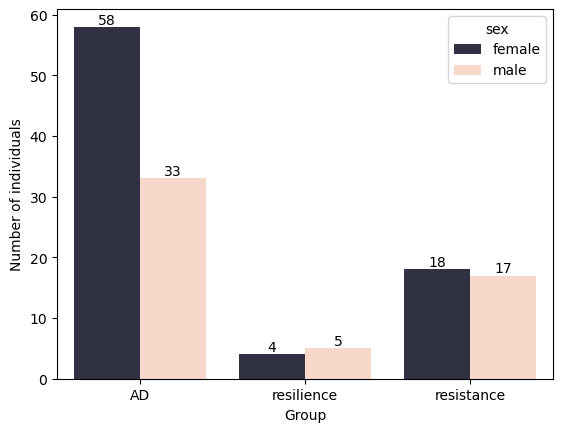

In [8]:
to_plot = concat.groupby(["Group", "sex"]).individualID.nunique().reset_index()
print(to_plot.head(2))
palette = {"female":"#2D3047", "male":"#ffd5c2"}
ax = sns.barplot(data = to_plot, x="Group", hue="sex", y="individualID", palette=palette)
for container in ax.containers:
    ax.bar_label(container)
ax.set_ylabel("Number of individuals")

  Group  apoe4_allele  individualID
0    AD           0.0            42
1    AD           1.0            48


Text(0, 0.5, 'Number of individuals')

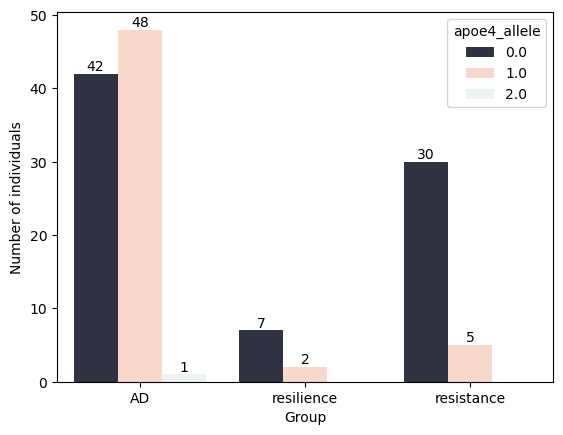

In [9]:
to_plot = concat.groupby(["Group", "apoe4_allele"]).individualID.nunique().reset_index()
print(to_plot.head(2))
palette = {0:"#2D3047", 1:"#ffd5c2", 2:"#eef2f3"}
ax = sns.barplot(data = to_plot, x="Group", hue="apoe4_allele", y="individualID", palette=palette)
for container in ax.containers:
    ax.bar_label(container)
ax.set_ylabel("Number of individuals")

  Group  Braak  individualID
0    AD    4.5             5
1    AD    5.0            58


Text(0, 0.5, 'Number of individuals')

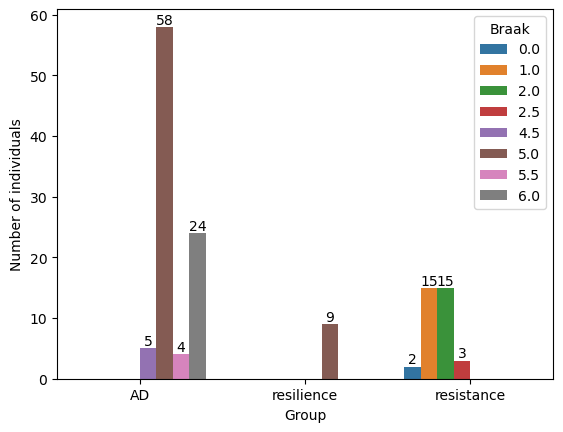

In [10]:
to_plot = concat.groupby(["Group", "Braak"]).individualID.nunique().reset_index()
print(to_plot.head(2))
palette = {0:"#2D3047", 1:"#ffd5c2", 2:"#eef2f3"}
ax = sns.barplot(data = to_plot, x="Group", hue="Braak", y="individualID")#, palette=palette)
for container in ax.containers:
    ax.bar_label(container)
ax.set_ylabel("Number of individuals")

  Group  CERAD  individualID
0    AD    1.0            40
1    AD    2.0            12


Text(0, 0.5, 'Number of individuals')

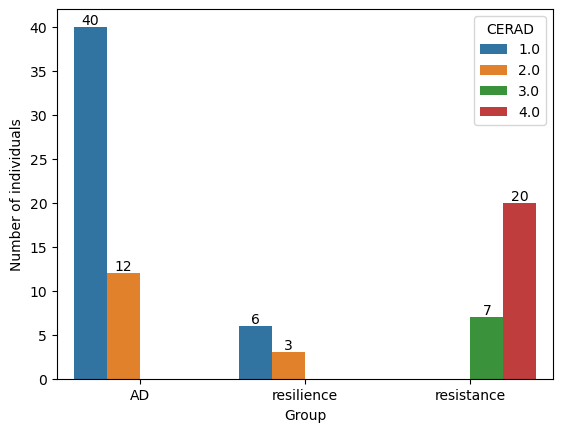

In [79]:
var="CERAD"
to_plot = concat.groupby(["Group", var]).individualID.nunique().reset_index()
print(to_plot.head(2))
palette = {0:"#2D3047", 1:"#ffd5c2", 2:"#eef2f3"}
ax = sns.barplot(data = to_plot, x="Group", hue=var, y="individualID")#, palette=palette)
for container in ax.containers:
    ax.bar_label(container)
ax.set_ylabel("Number of individuals")

In [11]:
genes = pd.read_csv("/remote/home/eloiseb/data/rna/combined_ros_map_mayo_bulk_count.csv")
genes =genes.drop("Sample_num", axis=1).columns.tolist()

In [ ]:
df_tissue = pd.DataFrame(columns=["Sample_num", "celltypes"]+ genes)
for i,it in enumerate(ff):
    for j,ct in enumerate(celltypes):
        df_tissue.loc[len(df_tissue), :] = [it, ct] + ll[i,j, :].tolist()
df_tissue

df_tissue.to_pickle("all_group_interest_rosmap_mayo.pickle")

In [12]:
df_tissue = pd.read_pickle("all_group_interest_rosmap_mayo.pickle")

In [13]:
df_tissue = df_tissue.merge(concat, left_on="Sample_num", right_on="specimenID")

In [14]:
df_tissue.rename(columns={"RIN2_x":"RIN2" }, inplace=True)

In [17]:
df_tissue = df_tissue[df_tissue.Study=="ROSMAP"]
df_tissue

,Sample_num,celltypes,PON1,NUGGC,PRADC1,EVI5L,CEP95,ORC1,DMKN,NCK1,...,apoe4_allele,sex,Study,thal,tissue_y,ethnicity,CDR,plaqueMean,ethnicity_y,Group
329,rosemap_07_120410,AST,0.0,0.0,0.0,0.010442,0.0,0.019439,0.01944,0.005462,...,0.0,male,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,resistance
330,rosemap_07_120410,EXC,0.000216,0.0,0.0,0.001469,0.0,0.0,0.0,0.000829,...,0.0,male,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,resistance
331,rosemap_07_120410,Endo-Mural,26.405048,17.488754,40.485184,195.69368,27.733715,16.27528,43.17057,21.934231,...,0.0,male,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,resistance
332,rosemap_07_120410,INH,0.870749,0.0,105.891991,445.32074,30.321283,0.0,14.934854,0.0,...,0.0,male,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,resistance
333,rosemap_07_120410,MIC,4.421737,0.0,75.710487,428.829285,29.37739,0.0,25.853678,6.334235,...,0.0,male,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,resistance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,rosemap_952_131107,Endo-Mural,18.640646,12.968178,25.785488,186.860535,55.485832,20.544697,34.358471,38.041431,...,1.0,male,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,AD
941,rosemap_952_131107,INH,0.0,0.0,81.400093,604.008057,123.696976,0.0,0.0,37.279541,...,1.0,male,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,AD
942,rosemap_952_131107,MIC,6.98703,2.825322,12.665039,77.170578,18.833658,3.711326,6.36495,19.27981,...,1.0,male,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,AD
943,rosemap_952_131107,OLD,1.724604,0.0,17.986052,103.86338,23.021992,5.298292,6.117005,21.834618,...,1.0,male,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,AD


# Multivariate

In [ ]:

# from statsmodels.stats.multitest import multipletests 
#from pydeseq2.default_inference import DefaultInference
# #import diffxpy.api as de
# from statannotations.Annotator import Annotator
import seaborn as sns
from sklearn.model_selection import LeaveOneOut, RepeatedKFold, RepeatedStratifiedKFold, StratifiedGroupKFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import mannwhitneyu, spearmanr, pearsonr

# from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from tqdm import tqdm
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score
from joblib import Parallel, delayed
from sklearn.feature_selection import VarianceThreshold 
import warnings
warnings.filterwarnings("ignore")
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

feat_ = [50, 100, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
import os
models = {
                                'EN': LogisticRegression(penalty='elasticnet', l1_ratio=0.5, fit_intercept=False, solver='saga', max_iter=10000), #'EN': customLogisticRegressionCV(cv=5, l1_ratios=[0, 0.25, 0.5, 0.75, 1], fit_intercept=False),
                                'LASSO': LogisticRegression(penalty='l1', fit_intercept=False, solver='saga', max_iter=10000), #customLogisticRegressionCV(cv=5, l1_ratios=[1], fit_intercept=False), #
                                'Ridge': LogisticRegression(penalty='l2', fit_intercept=False), #customLogisticRegressionCV(cv=5, l1_ratios=[0], fit_intercept=False), #
                                'Random Forest': RandomForestClassifier(n_jobs=-1),
                                'KNN': KNeighborsClassifier(n_jobs=-1),
                                'SVM': SVC(probability=True),  #rbf for AD, linear for LBD
                                'XGBoost': XGBClassifier(n_jobs=-1),
                                # "LGBM":LGBMClassifier(random_state=1)
                            }

variance_thres = 0.0

                  
def train_final(X,y,group,ri, mod,
                n_out_splits,exp,
               ct, nb):
    l_y_pred = []
    l_y_pred_c = []
    l_y_test = []
    pred_dum = []
    pred_dum_c = []
    res = pd.DataFrame( columns=['model','celltype',"Experiment",'AUROC',"AUPRC","pvalue", "F1", "AUROC random", "AUPRC random", "F1 random"])
    i = 0
    rng = np.random.default_rng(ri)
    rints = rng.integers(low=0, high=1000, size=1)
    outer_cv =  StratifiedKFold(n_splits=n_out_splits, shuffle=True,  random_state=rints[0])
    nb_ = len(y)
    df_results = pd.DataFrame(columns=["case","iter"]+np.arange(nb_).tolist())
    for i1, (train_index, test_index) in enumerate(outer_cv.split(X,y,groups=group)):
        
        X_train, X_test = X[train_index, :], X[test_index, :]
        y_train, y_test = y[train_index], y[test_index]
                            # patient_inner = pat[train_index]
        if (len(set(y_train))>1) & (len(set(y_test))>1):
            pipe = Pipeline([#("scale", StandardScaler()),
                             ("filter",VarianceThreshold(threshold=variance_thres)),
                                                   # ("red", PCA(n_components=len(train_index))),
                                                       ("select", SelectKBest(f_classif,k=nb)),
                                                    ("model", models[mod])
                                                    ])
            pipe.fit(np.array(X_train), np.array(y_train))
    
            y_pred = np.array(pipe.predict_proba(np.array(X_test))[:, 1])
            y_pred_c = np.array(pipe.predict(np.array(X_test)))
            tmp = np.empty((nb_))
            tmp[test_index] = y_pred
            df_results.loc[len(df_results),:] = ["pred",i1] + tmp.tolist()
            tmp = np.empty((nb_))
            tmp[test_index] = y_test
            df_results.loc[len(df_results),:] = ["true",i1] + tmp.tolist()
            l_y_pred.append(y_pred)
            l_y_test.append(y_test)
            l_y_pred_c.append(y_pred_c)
            pipe = Pipeline([#("scale", StandardScaler()),
                             ("filter",VarianceThreshold(threshold=variance_thres)),

                                                    # ("red", PCA(n_components=len(train_index))),
                                                       ("select", SelectKBest(f_classif,k=nb)),
                                                    ("model", DummyClassifier())
                                                    ])
            pipe.fit(np.array(X_train), np.array(y_train))
            y_pred_dummy = np.array(pipe.predict_proba(np.array(X_test))[:, 1])
            pred_dum.append(y_pred_dummy)  
            y_pred_dummy = np.array(pipe.predict(np.array(X_test)))
            pred_dum_c.append(y_pred_dummy)   
    y_preds = np.hstack(l_y_pred)
    y_preds_c = np.hstack(l_y_pred_c)
    y_tests = np.hstack(l_y_test)
    y_pred_du = np.hstack(pred_dum)
    y_pred_du_c = np.hstack(pred_dum_c)
    auc = roc_auc_score(y_tests, y_preds)#, average="weighted")
    auprc = average_precision_score(y_tests, y_preds)#, average="weighted")#np.mean(l_auroc)
    f1 = f1_score(y_tests, y_preds_c)#, average="weighted")
    pv = mannwhitneyu(y_preds[y_tests==0], y_preds[y_tests==1]).pvalue
    auc_dum = roc_auc_score(y_tests, y_pred_du)#, average="weighted")
    auprc_dum = average_precision_score(y_tests, y_pred_du)#, average="weighted")
    f1_dum = average_precision_score(y_tests, y_pred_du_c)#, average="weighted")

    res.loc[0,:] = [mod, ct,exp,auc, auprc,pv,f1,auc_dum, auprc_dum, f1_dum]
    
    return res, df_results



warnings.filterwarnings("ignore")
model_list = ['LASSO', 'Ridge', 'EN','Random Forest', 'SVM', "XGBoost"]#,"LGBM" ]
# celltypes  = list(adata.obs.celltype.unique())

i = 0
#for nb in [2, 5, 10, 15, 20,25,40, 50,60, 75, 100]:
with_sex= False
with_age = False

n_out_splits = 5
nb_boostrap = 5
nb_boostrap1 = 5


n_out_splits = 5
min_count = 5
min_total_count =15
# outer_cv = StratifiedKFold(n_splits=10,shuffle=True)
outer_cv_results = {key: [] for key in [ "ct", "outer_split","ri", "n_features", "algo", "F1","AUROC", "AUPRC","F1 random","AUROC random", "AUPRC random"]}
nb=2000
res = []
res_inn = []
for cond1 in ["AD", "resistance"]:
    cond0 = "resilience"
    namef = "./multivariate_resilience_ad_filtered_nb_feat%s.pickle"%str(nb)
    # if not os.path.exists(namef):
    # for exp in combine["Experiment"].unique():
            # print(namef)
        # for br in brain_regions:
    exp = cond0 + "|" + cond1
    for ct in celltypes:
               for l_mod in model_list:
                    
                    print(ct)
                    
                   
                    condition_filtering = ((df_tissue["Group"].isin([cond0,cond1]))
                                           &df_tissue.celltypes.isin([ct])
                                          )
                                           # & (combine.Experiment.isin([exp])))
                    dict_cond = {cond0:0,cond1:1}


                    conds = df_tissue["Group"].unique().tolist()
                    dict_cond = {it:0 if it ==cond0 else 1 for it in conds}
                    comb_filtered = df_tissue[condition_filtering]
                    
                    # comb_filtered =  comb_filtered[comb_filtered.X.sum(0)!=0]

                    patients,X,y = (comb_filtered[["Sample_num","Group"]].reset_index(drop=True),
                                    comb_filtered[genes].values, comb_filtered["Group"].map(dict_cond).values)


                    ma = X.copy()
                    ma[ma<=min_count] = 0
                    ma[ma>min_count] = 1
                    list_ = ma.sum(0)>min_count
                    list_2 = X.astype(float).sum(0)>min_total_count
                    # list_e = [it for ii, it in enumerate(list_) if it and list_2[ii]]
                    list_e = [True if it and list_2[ii] else False for ii, it in enumerate(list_) ]
                    X = X[:,list_e]
                    print(X.shape)
                   
                    pat = comb_filtered["Sample_num"].tolist()
                 
                    outal = Parallel(n_jobs=30, verbose=100)(
                                                delayed(train_final)(X,y,pat,ri,l_mod,
                                                                     n_out_splits,exp,
                                           ct, nb) for ri in tqdm(range(nb_boostrap)))
                    # print(out)
                    out = [it[0] for it in outal]
                    pred_df = [it[1] for it in outal]
                    pred_df = pd.concat(pred_df)
                    # pred_df_ctrl = pd.concat([it[2] for it in outal])
                    # pred_df_lrrk2 = pd.concat([it[2] for it in outal])
                    # print(out)
                  
                    pred_df["ct"] = ct
                    pred_df["Experiment"] = exp
                    rest = pd.concat(out)
                    mean_auc = np.mean(rest["AUROC"].values)
                    std_auc = np.std(rest["AUROC"].values)
                    mean_au = np.mean(rest["AUPRC"].values)
                    mean_f1 = np.mean(rest["F1"].values)
                    mea_du = np.mean(rest["AUROC random"].values)
                    # if mean_auc> mea_du:
                    #     pred_df.to_pickle("%s_%s_%s_with_sex_age.pickle"%(br,ct,comp))
                    #     # pred_df_ctrl["br"] = br
                        # pred_df_ctrl["ct"] = ct
                        # pred_df_lrrk2["br"] = br
                        # pred_df_lrrk2["ct"] = ct
                        # pred_df_ctrl.to_pickle("pred_ctrl_%s_%s_%s_with_sex_age.pickle"%(br,ct,comp))
                        # red_df_lrrk2.to_pickle("pred_lrrk2_%s_%s_%s_with_sex_age.pickle"%(br,ct,comp))
                    print(f"{ct}, {l_mod}: AUC: {mean_auc} +/- {std_auc}, AUPRC: {mean_au}, f1: {mean_f1}, random: {mea_du}") 
                    res.append(rest)
                    i+=1
    pd.concat(res).to_pickle(namef)         
pd.concat(res).to_pickle(namef)


In [183]:
# res = pd.concat(res)
res = pd.read_pickle("./multivariate_resilience_ad_filtered.pickle")
final = []
for ct in res.celltype.unique():
    for exp in res.Experiment.unique():
        tmp = res[(res.celltype==ct) &(res.Experiment==exp)]
        tmp2 =tmp.groupby(["model"]).agg({"AUROC":"mean", "AUPRC":"mean"})
        tmp2 = tmp2.sort_values("AUROC", ascending=False)
        best_m = tmp2.index[0]
        tmp3 = tmp[tmp.model ==best_m]
        final.append(tmp3)
final = pd.concat(final)
final.reset_index(inplace=True, drop=True)
final

,model,celltype,Experiment,AUROC,AUPRC,pvalue,F1,AUROC random,AUPRC random,F1 random
0,XGBoost,AST,resilience|AD,0.690171,0.935585,0.071887,0.886792,0.443376,0.838099,0.852459
1,XGBoost,AST,resilience|AD,0.595085,0.880562,0.370889,0.888889,0.443376,0.838099,0.852459
2,XGBoost,AST,resilience|AD,0.702991,0.896788,0.054617,0.909091,0.443376,0.838099,0.852459
3,XGBoost,AST,resilience|AD,0.626068,0.876651,0.234144,0.918919,0.443376,0.838099,0.852459
4,XGBoost,AST,resilience|AD,0.595085,0.870112,0.370877,0.918919,0.443376,0.838099,0.852459
...,...,...,...,...,...,...,...,...,...,...
65,SVM,OPC,resilience|resistance,0.600823,0.840327,0.380598,0.857143,0.432099,0.724412,0.75
66,SVM,OPC,resilience|resistance,0.547325,0.8179,0.687784,0.857143,0.432099,0.724412,0.75
67,SVM,OPC,resilience|resistance,0.45679,0.76605,0.714864,0.857143,0.432099,0.724412,0.75
68,SVM,OPC,resilience|resistance,0.621399,0.84881,0.28939,0.857143,0.432099,0.724412,0.75


In [377]:
nb

2000

celltype    variable    
AST         AUPRC           0.848422
            AUPRC random    0.724412
            AUROC           0.644856
            AUROC random    0.432099
EXC         AUPRC           0.856012
            AUPRC random    0.724412
            AUROC           0.636214
            AUROC random    0.432099
Endo-Mural  AUPRC           0.811247
            AUPRC random    0.724412
            AUROC           0.518519
            AUROC random    0.432099
INH         AUPRC           0.771407
            AUPRC random    0.724412
            AUROC           0.519753
            AUROC random    0.432099
MIC         AUPRC           0.779561
            AUPRC random    0.724412
            AUROC           0.501235
            AUROC random    0.432099
OLD         AUPRC            0.82472
            AUPRC random    0.724412
            AUROC           0.555556
            AUROC random    0.432099
OPC         AUPRC           0.810754
            AUPRC random    0.724412
            A

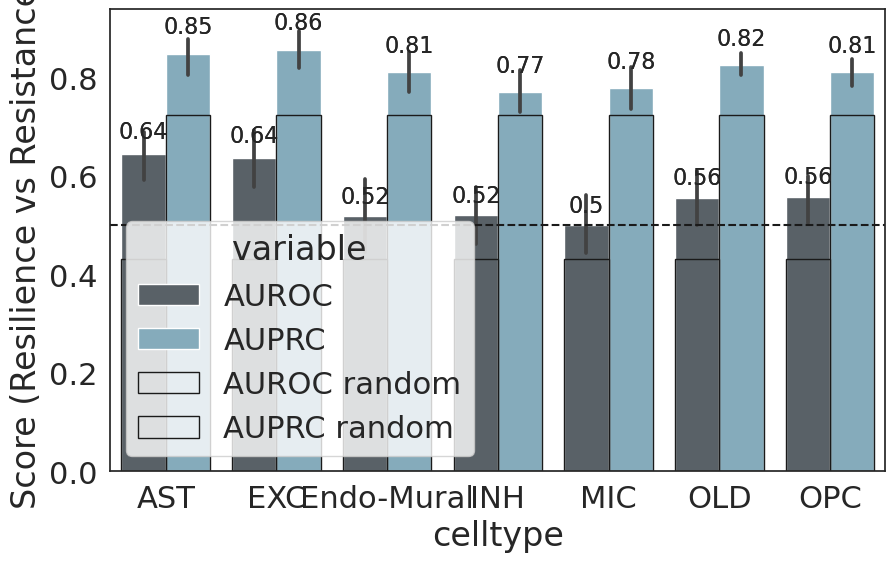

In [376]:
toplot = pd.melt(final[final.Experiment=="resilience|resistance"], id_vars =["celltype"], 
                 value_name="Score",
                 value_vars=["AUROC", "AUPRC", "AUROC random", "AUPRC random"])
toplot



import seaborn as sns
cond = "SPOR$GBA1"
Exp = "Tissue"
tmp = final#[final.Experiment ==Exp]
# sns.set(style="white", font_scale=1.2)
# g = sns.FacetGrid(data=tmp, col="Experiment", col_wrap=1,height=4, aspect=3,)
# g.map_dataframe(sns.barplot, x="celltype", y="AUROC", hue="model", palette="tab20")#, palette=PALETTE)#, style="model")
# # g.map_dataframe(sns.barplot, x="celltype", y="AUROC random", hue="model", fill=False,color="black")#, style="model")


# for ax in g.axes.flatten():
#     ax.axhline(y=0.5, c="k")
#     ax.axhline(y=0.7, c="k", linestyle=":")
# #     #ax.axhline(y=0.8, c="k", linestyle="--")
# #     tit = ax.get_title()
# #     tit = tit.replace("covar =", "").replace("$", "vs")
# #     ax.set_title(tit)
# #     for i, bar in enumerate(ax.patches):
# #         if i >=66:
# #             bar.set_hatch("//")
# #             bar.set_edgecolor("k")
# #     #ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# plt.legend()
# plt.show()
sns.set(style="white", font_scale=2)

final["AUROC"] = final["AUROC"].astype(float)
fig, ax = plt.subplots(figsize=(10,6))
palette_exp['AUROC'] = palette_exp['resistance']
palette_exp['AUPRC'] = palette_exp['resilience']
sns.barplot(data=toplot[toplot["variable"].isin(["AUROC","AUPRC"])], x="celltype", 
            y="Score", ax=ax, hue="variable", palette=palette_exp)
for bars in ax.containers:
    # if bars.get_label() == hue_order[0]:
        # group_total = df_f
    # else:
    # group_total = df_t
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{(height):.2}', (x + width/2, y + height*1.05), ha='center', fontsize=16)
sns.barplot(data=toplot[toplot["variable"].isin(["AUROC random","AUPRC random"])], x="celltype", 
            y="Score", ax=ax, hue="variable", fill=False, color="k", edgecolor="k")
# sns.barplot(data=final, x="celltype", y="AUPRC", ax=ax, color=palette_exp['AD'])
ax.set_ylabel("Score (Resilience vs Resistance)")
ax.axhline(0.5, c="k", linestyle="--")
# pairs=[((ct, "Deconvoluted Nuclei"), (ct, "Deconvoluted Tissue")) for ct in celltypes]
# pairs+=[((ct, "Deconvoluted Nuclei"), (ct, "snRNA")) for ct in celltypes]
# pairs+=[((ct, "Deconvoluted Tissue"), (ct, "snRNA")) for ct in celltypes]
      

# annotator = Annotator(ax, pairs, data=final, x="celltype", y="AUROC", hue="Experiment")
# annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction="BH")
# annotator.apply_and_annotate()

plt.savefig(os.path.join("figures/model_cv_resil_resit_all_rosmap_nb_%s.svg"%str(nb)))
toplot.groupby(["celltype","variable"]).Score.mean()


celltype    variable    
AST         AUPRC            0.89194
            AUPRC random    0.838099
            AUROC            0.64188
            AUROC random    0.443376
EXC         AUPRC            0.93332
            AUPRC random    0.838099
            AUROC           0.693162
            AUROC random    0.443376
Endo-Mural  AUPRC           0.946579
            AUPRC random    0.838099
            AUROC           0.726923
            AUROC random    0.443376
INH         AUPRC           0.911745
            AUPRC random    0.838099
            AUROC            0.67094
            AUROC random    0.443376
MIC         AUPRC           0.934832
            AUPRC random    0.838099
            AUROC           0.671795
            AUROC random    0.443376
OLD         AUPRC           0.859175
            AUPRC random    0.838099
            AUROC           0.515171
            AUROC random    0.443376
OPC         AUPRC           0.915289
            AUPRC random    0.838099
            A

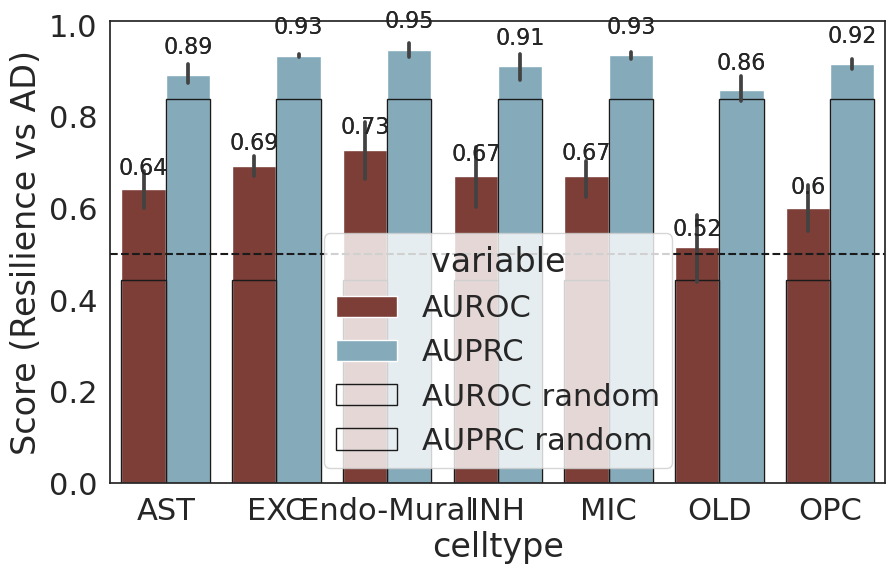

In [189]:
toplot = pd.melt(final[final.Experiment=="resilience|AD"], id_vars =["celltype"], 
                 value_name="Score",
                 value_vars=["AUROC", "AUPRC", "AUROC random", "AUPRC random"])
toplot



import seaborn as sns
cond = "SPOR$GBA1"
Exp = "Tissue"
tmp = final#[final.Experiment ==Exp]
# sns.set(style="white", font_scale=1.2)
# g = sns.FacetGrid(data=tmp, col="Experiment", col_wrap=1,height=4, aspect=3,)
# g.map_dataframe(sns.barplot, x="celltype", y="AUROC", hue="model", palette="tab20")#, palette=PALETTE)#, style="model")
# # g.map_dataframe(sns.barplot, x="celltype", y="AUROC random", hue="model", fill=False,color="black")#, style="model")


# for ax in g.axes.flatten():
#     ax.axhline(y=0.5, c="k")
#     ax.axhline(y=0.7, c="k", linestyle=":")
# #     #ax.axhline(y=0.8, c="k", linestyle="--")
# #     tit = ax.get_title()
# #     tit = tit.replace("covar =", "").replace("$", "vs")
# #     ax.set_title(tit)
# #     for i, bar in enumerate(ax.patches):
# #         if i >=66:
# #             bar.set_hatch("//")
# #             bar.set_edgecolor("k")
# #     #ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# plt.legend()
# plt.show()
final["AUROC"] = final["AUROC"].astype(float)
fig, ax = plt.subplots(figsize=(10,6))
palette_exp['AUROC'] = palette_exp['AD']
palette_exp['AUPRC'] = palette_exp['resilience']
sns.set(style="white", font_scale=2)
sns.barplot(data=toplot[toplot["variable"].isin(["AUROC","AUPRC"])], x="celltype", 
            y="Score", ax=ax, hue="variable", palette=palette_exp)
# ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f')
for bars in ax.containers:
    # if bars.get_label() == hue_order[0]:
        # group_total = df_f
    # else:
    # group_total = df_t
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{(height):.2}', (x + width/2, y + height*1.05), ha='center', fontsize=16)
        
sns.barplot(data=toplot[toplot["variable"].isin(["AUROC random","AUPRC random"])], x="celltype", 
            y="Score", ax=ax, hue="variable", fill=False, color="k", edgecolor="k")
# sns.barplot(data=final, x="celltype", y="AUPRC", ax=ax, color=palette_exp['AD'])
ax.set_ylabel("Score (Resilience vs AD)")
ax.axhline(0.5, c="k", linestyle="--")
# pairs=[((ct, "Deconvoluted Nuclei"), (ct, "Deconvoluted Tissue")) for ct in celltypes]
# pairs+=[((ct, "Deconvoluted Nuclei"), (ct, "snRNA")) for ct in celltypes]
# pairs+=[((ct, "Deconvoluted Tissue"), (ct, "snRNA")) for ct in celltypes]
      

# annotator = Annotator(ax, pairs, data=final, x="celltype", y="AUROC", hue="Experiment")
# annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction="BH")
# annotator.apply_and_annotate()

plt.savefig(os.path.join("figures/model_cv_resil_AD_all_rosmap.svg"))
toplot.groupby(["celltype","variable"]).Score.mean()


# Univariate

In [ ]:

df_dif = []
#ct_t = "CA1"
method = "wilcoxon"
group="Group"
REF="resilience"

min_count = 5
min_total_count =15
# for tissue in df_tissue.tissue.unique():

dico_boostrap = {}
# if True:
nb_boostrap =1
for it in range(nb_boostrap):
    for test in ["AD", "resistance"]:
        # combined = combine[combine.Group.isin(["VEH","Veh", test])].copy(deep=True)
        combined = df_tissue[(df_tissue[group].isin([REF, test]))
                       ].copy(deep=True)
        # combined = combined.sample(frac=0.8,replace=False, random_state=it)
        count_df = combined.set_index("Sample_num")[genes]
       
        cl = combined.set_index("Sample_num")[[ 
                                               group, "celltypes","Study", "sex"]]
        
        if combined [group].nunique()>1:
            for ii, ct in enumerate(cl.celltypes.unique()):
                        print(ct)
                        #genes =all_genes
                        
                        tmp_g = np.asarray(genes)[np.where(mask[ii,:]==1)[0]].tolist()
                        c_tmp = count_df.loc[(cl.celltypes==ct),:][tmp_g].astype(float)
                        gene_null = np.where(c_tmp.sum(0)!=0)[0]
                        print(gene_null.shape)
                        tmp_g = np.asarray(tmp_g)[gene_null]
                        c_tmp = c_tmp[tmp_g.tolist()]
                        


                        ma = c_tmp.copy()
                        ma[ma<=min_count] = 0
                        ma[ma>min_count] = 1
                        list_ = ma.sum(0)>min_count
                        list_2 = c_tmp.astype(float).sum(0)>min_total_count
                        # list_e = [it for ii, it in enumerate(list_) if it and list_2[ii]]
                        list_e = [True if it and list_2[ii] else False for ii, it in enumerate(list_) ]
                        c_tmp = c_tmp.iloc[:,list_e]
                        print(c_tmp.shape)
                
                        cl_tmp = cl.loc[(cl.celltypes==ct),:]
                        print(cl_tmp[group].unique())
                        print(cl_tmp.groupby([group]).size())
                        dds = DeseqDataSet(
                            counts=c_tmp.astype(int),
                            metadata=cl_tmp,
                            design_factors=[group, "sex"],
                            
                            refit_cooks=True,
                            n_cpus=8,
                            )
                        dds.deseq2()
        
                        stat_res = DeseqStats(dds,contrast=[group, test, REF])
                        stat_res.summary()
                        glist =stat_res.results_df
                        glist["gene"] =glist.index.tolist()
                        pp = "pvalue"#"pvals"
                        lf = "log2FoldChange"#"logfoldchanges"
                       # pp = "padj"
        
                        dat = ad.AnnData(c_tmp)
                        dat.obs = cl_tmp
                        dat.var["gene"] = c_tmp.columns.tolist()
        
                        # sc.tl.rank_genes_groups(dat, groupby=group, method=method, 
                        #                             rankby_abs=True,
                        #                            gene_symbols="gene",
                        #                             #gene_symbols="peakid",
                        #                             key_added = method)
                        # glist = sc.get.rank_genes_groups_df(dat, group=test, 
                        #                                     gene_symbols="gene",
                        #                                     key=method, #log2fc_min=0.25, 
                        #                                     )#['names'].squeeze().str.strip().tolist()
                        # # glist = glist.merge(dat.var, on="names")
        
                        # #     #min_pval = glist[glist.pvals_adj>0]["pvals_adj"].min()
        
                        # pp = "pvals"
                        # lf = "logfoldchanges"
                        glist["padj_fdr"] = 1
                        glist.loc[~glist[pp].isna(),"padj_fdr"] = multipletests(
                                               glist.loc[~glist[pp].isna(),pp].values, method="fdr_bh")[1]
                        pp = "padj_fdr"
        
                        glist["celltypes"] = ct
                        glist["Test"] = test
                        glist["Tissue"] = "All"
                        glist["Ref"] = REF
                        glist.loc[glist[lf].isna(),lf] =0  
                        glist.loc[glist[pp].isna(),pp] = 1   
                        glist["iteration"] = it
        
        
                        FC=1
                        pval=0.05
                        pval2 = pval
                        #pval2 = 1e-100
                        #print(glist.sort_values("padj_fdr"))
                        genenames = glist[(np.abs(glist[lf])>FC) &( glist[pp]<pval2)]["gene"].tolist()
        
                        df_dif.append(glist)
                        print(len(genenames))
                        # if len(genenames)!=0:
                        #     try:
                        #         visuz.GeneExpression.volcano(df=glist, lfc=lf, pv=pp, show=True,
                        #                                          pv_thr=(pval, pval), lfc_thr=(FC, FC),
                        #                                  geneid="gene",
                        #                                             genenames=genenames,
                        #                                  gstyle=2,
                        #                                  plotlegend=True,
                        #                                  legendlabels=[test, "NS", "Veh"], 
                        #                                         sign_line=True,#figname = savepath + "deconv_promoter_volcano_%s_%s"%(ct,ba),
                        #                                          color=('#724600', "grey", '#004d4b'))
                        #     except:
                        #         print("ok")
print("done")


In [141]:
df_tot = pd.concat(df_dif)
df_tot.to_pickle("DE_deseq2_refit_true_RESILIENCE_SEX_adj.pickle")
df_tot

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene,padj_fdr,celltypes,Test,Tissue,Ref,iteration
SLC35A2,1.235050,-1.285009,1.215609,-1.057091,0.290470,NaN,SLC35A2,0.771865,AST,AD,All,resilience,0
PPP1R9A,2.684990,-2.021503,1.288544,-1.568827,0.116688,NaN,PPP1R9A,0.696649,AST,AD,All,resilience,0
MICU3,2.040124,-1.271590,1.644855,-0.773071,0.439480,NaN,MICU3,0.812538,AST,AD,All,resilience,0
AHCY,1.715020,-2.517122,1.767257,-1.424310,0.154357,NaN,AHCY,0.720411,AST,AD,All,resilience,0
TMX3,1.155144,-2.346898,1.923213,-1.220301,0.222351,NaN,TMX3,0.745344,AST,AD,All,resilience,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBE2J1,38.616346,3.804006,1.422376,2.674403,0.007486,0.048661,UBE2J1,0.062742,OPC,resistance,All,resilience,0
ABHD17B,6.143007,1.207457,1.653201,0.730376,0.465161,NaN,ABHD17B,0.562868,OPC,resistance,All,resilience,0
PDCD10,2.177981,-0.676529,1.668269,-0.405527,0.685090,NaN,PDCD10,0.762449,OPC,resistance,All,resilience,0
TMX4,4.677657,0.946901,2.328529,0.406652,0.684264,NaN,TMX4,0.762218,OPC,resistance,All,resilience,0


In [138]:
df_tot = pd.read_pickle("DE_deseq2_refit_true_RESILIENCE_SEX_adj.pickle")
df_tot

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene,padj_fdr,celltypes,Test,Tissue,Ref,iteration
PON1,9.332183,0.147297,0.439559,0.335101,0.737549,0.999961,PON1,0.999961,MIC,resistance,All,resilience,0
NUGGC,3.475769,-0.076183,1.307762,-0.058255,0.953546,0.999961,NUGGC,0.999961,MIC,resistance,All,resilience,0
PRADC1,50.358774,0.007836,0.231268,0.033883,0.972970,0.999961,PRADC1,0.999961,MIC,resistance,All,resilience,0
EVI5L,368.466803,0.192679,0.210155,0.916841,0.359226,0.999961,EVI5L,0.999961,MIC,resistance,All,resilience,0
CEP95,43.526936,-0.258838,0.235704,-1.098146,0.272141,0.999961,CEP95,0.999961,MIC,resistance,All,resilience,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DENND3,4.571503,-3.165293,1.884965,-1.679231,0.093107,0.843976,DENND3,0.843976,AST,AD,All,resilience,9
MRPL51,2.115200,-2.782297,1.501187,-1.853398,0.063825,0.824750,MRPL51,0.824750,AST,AD,All,resilience,9
CTPS2,1.032620,-3.010188,1.486741,-2.024689,0.042899,0.790006,CTPS2,0.790006,AST,AD,All,resilience,9
NBEAL1,0.913907,-2.602718,1.349741,-1.928310,0.053817,0.824750,NBEAL1,0.824750,AST,AD,All,resilience,9


Text(0, 0.0, 'OPC')
Text(0, 1.0, 'EXC')
Text(0, 2.0, 'MIC')
Text(0, 3.0, 'INH')


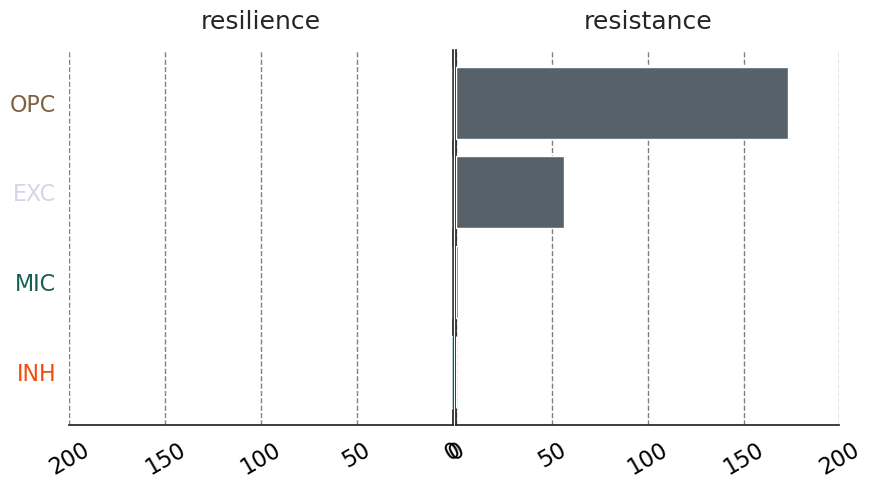

In [256]:
FC =0
pval=0.05
pp = "padj"
de = df_tot[(df_tot[pp]<=pval) &(np.abs(df_tot[lf])>FC)&(df_tot.Test=="resistance")]
# count = de.groupby(["celltypes"]).size().reset_index() #count()["log2FoldChange"].reset_index()

# print(df)
# df["group"] = [it[0] for it in df.index.tolist()]
# df = df.set_index("group")
# df = df
# df
# count
cond2 = "resistance"
cond1="resilience"
to_plot = pd.DataFrame(index=de.celltypes.unique().tolist())

up = de[de[lf]>FC]
up = pd.DataFrame(up.groupby("celltypes").size(),#/len(up),
                      columns=["up"])
to_plot = to_plot.join(up).fillna(0)
down = de[de[lf]<-FC]
down = pd.DataFrame(down.groupby("celltypes").size(),#/len(up),
                      columns=["down"])
to_plot = to_plot.join(down).fillna(0)

to_plot = to_plot.sort_values("up", ascending=False)

# to_plot = df_toplot.set_index("celltype")
# to_plot = np.log(to_plot.astype(float))
palette= {"up": "#4dac26", "down":"#d01c8b"}
palette= {"down": "#F6E8C3", "up":"#003C30"}
fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()
    
ct = to_plot.index.tolist()
    
left1 = len(to_plot) * [0]
left2 = len(to_plot) * [0]
index = to_plot.index#.map('|'.join)
    # for idx, name in enumerate(brain_regions):
axes[0].barh(index, to_plot["down"], left = left1, color=palette_exp[cond1],
                 zorder=10, align="center", alpha=1)#, fill=False)
axes[1].barh(index, to_plot["up"], left = left2, color=palette_exp[cond2],
             zorder=10, align="center", alpha=1)#, fill=False)
        # left1 = left1 + down[name]
        # left2 = left2 + up[name]
    
axes[0].set_title(cond1, fontsize=18, pad=15)
axes[1].set_title(cond2, fontsize=18, pad=15)
    
                
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 
    
    # To show data from highest to lowest
plt.gca().invert_yaxis()
        
axes[0].set(yticks=ct, yticklabels=ct)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color
if True:
    axes[1].spines['right'].set_visible(False)
    axes[0].spines['left'].set_visible(False)
    axes[0].spines['top'].set_visible(False)
    axes[1].spines['top'].set_visible(False)
    
    
    font_color = 'black'
    tmp = []
    for label in (axes[0].get_xticklabels()):
        label.set(fontsize=16, color=font_color, rotation=30)
    for label in (axes[1].get_xticklabels()):
        label.set(fontsize=16, color=font_color, rotation=30)
    for label in (axes[0].get_yticklabels()):
        print(label)
        txt = label.get_text()#.split("|")[1]
    
        cond = label.get_text()#.split("|")[0]
        tmp.append(cond)
        label.set(color=PALETTE[cond], label=str(txt), fontsize=16 )
    
    # labels = [item.get_text() for item in axes[0].get_yticklabels()]
    
    axes[1].yaxis.set_ticks_position('none') 
    # adjust limits and draw grid lines
    # plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    axes[0].set_axisbelow(True)
    axes[0].xaxis.grid(color='gray', linestyle='dashed')
    axes[1].set_axisbelow(True)
    axes[1].xaxis.grid(color='gray', linestyle='dashed')
    
    max_x = max(max(axes[0].get_xticks()),max(axes[1].get_xticks()))
    axes[0].set_xlim(max_x,0)
    axes[1].set_xlim(0,max_x)
    plt.subplots_adjust(wspace=0.01, top=0.85, bottom=0.1, left=0.18, right=0.95)
    # plt.suptitle("Porportion of cell type-specific DAR", fontsize=18)
    # leg1 = plt.legend(brain_regions, bbox_to_anchor=([0.99, 1, 0, 0]), ncol=4, frameon=False)
    # ll = []
    # for it in list(set(tmp)):
    #     blue_line = lines.Line2D([], [], color=color_cond[it], 
    #                                         marker="o",
    #                                         linestyle='None',
    #                                         markersize=8, label=it)
    #     ll.append(blue_line)
    # leg2 = plt.legend(handles=ll, bbox_to_anchor=(1.5, 0.25))
    
    # axes[1].add_artist(leg1)
    
    plt.savefig("./figures/DE_OCR_resistant_resilient_.svg", bbox_inches="tight")
    plt.show()

In [373]:
exc_resi_resist = de[de.celltypes=="EXC"].sort_values("log2FoldChange", ascending=False)
opc_resi_resist = de[de.celltypes=="OPC"].sort_values("log2FoldChange", ascending=False)
len(exc_resi_resist)

56

Text(0, 0.0, 'AST')
Text(0, 1.0, 'EXC')
Text(0, 2.0, 'INH')


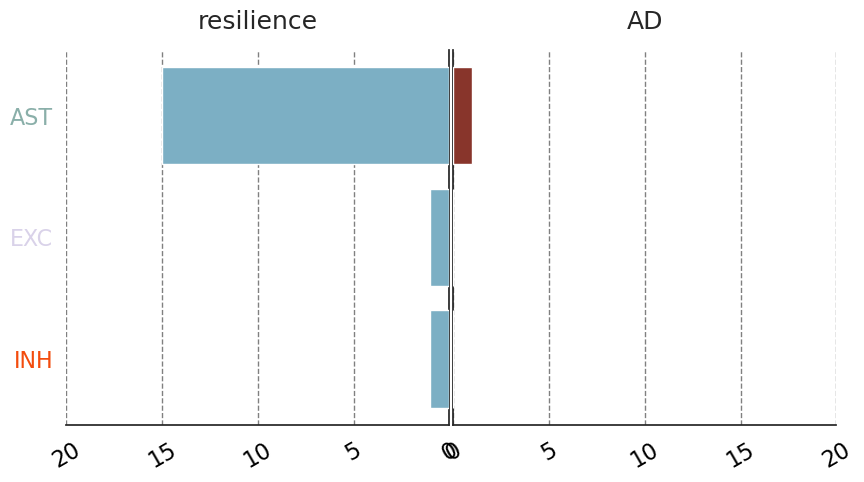

In [374]:
FC =0
pval=0.05
pp = "padj"
de = df_tot[(df_tot[pp]<=pval) &(np.abs(df_tot[lf])>FC)&(df_tot.Test=="AD")]
# count = de.groupby(["celltypes"]).size().reset_index() #count()["log2FoldChange"].reset_index()

# print(df)
# df["group"] = [it[0] for it in df.index.tolist()]
# df = df.set_index("group")
# df = df
# df
# count
cond2 = "AD"
cond1="resilience"
to_plot = pd.DataFrame(index=de.celltypes.unique().tolist())

up = de[de[lf]>FC]
up = pd.DataFrame(up.groupby("celltypes").size(),#/len(up),
                      columns=["up"])
to_plot = to_plot.join(up).fillna(0)
down = de[de[lf]<-FC]
down = pd.DataFrame(down.groupby("celltypes").size(),#/len(up),
                      columns=["down"])
to_plot = to_plot.join(down).fillna(0)

to_plot = to_plot.sort_values("up", ascending=False)

# to_plot = df_toplot.set_index("celltype")
# to_plot = np.log(to_plot.astype(float))
palette= {"up": "#4dac26", "down":"#d01c8b"}
palette= {"down": "#F6E8C3", "up":"#003C30"}
fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()
    
ct = to_plot.index.tolist()
    
left1 = len(to_plot) * [0]
left2 = len(to_plot) * [0]
index = to_plot.index#.map('|'.join)
    # for idx, name in enumerate(brain_regions):
axes[0].barh(index, to_plot["down"], left = left1, color=palette_exp[cond1],
                 zorder=10, align="center", alpha=1)#, fill=False)
axes[1].barh(index, to_plot["up"], left = left2, color=palette_exp[cond2],
             zorder=10, align="center", alpha=1)#, fill=False)
        # left1 = left1 + down[name]
        # left2 = left2 + up[name]
    
axes[0].set_title(cond1, fontsize=18, pad=15)
axes[1].set_title(cond2, fontsize=18, pad=15)
    
                
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 
    
    # To show data from highest to lowest
plt.gca().invert_yaxis()
        
axes[0].set(yticks=ct, yticklabels=ct)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color
if True:
    axes[1].spines['right'].set_visible(False)
    axes[0].spines['left'].set_visible(False)
    axes[0].spines['top'].set_visible(False)
    axes[1].spines['top'].set_visible(False)
    
    
    font_color = 'black'
    tmp = []
    for label in (axes[0].get_xticklabels()):
        label.set(fontsize=16, color=font_color, rotation=30)
    for label in (axes[1].get_xticklabels()):
        label.set(fontsize=16, color=font_color, rotation=30)
    for label in (axes[0].get_yticklabels()):
        print(label)
        txt = label.get_text()#.split("|")[1]
    
        cond = label.get_text()#.split("|")[0]
        tmp.append(cond)
        label.set(color=PALETTE[cond], label=str(txt), fontsize=16 )
    
    # labels = [item.get_text() for item in axes[0].get_yticklabels()]
    
    axes[1].yaxis.set_ticks_position('none') 
    # adjust limits and draw grid lines
    # plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    axes[0].set_axisbelow(True)
    axes[0].xaxis.grid(color='gray', linestyle='dashed')
    axes[1].set_axisbelow(True)
    axes[1].xaxis.grid(color='gray', linestyle='dashed')
    
    max_x = max(max(axes[0].get_xticks()),max(axes[1].get_xticks()))
    axes[0].set_xlim(max_x,0)
    axes[1].set_xlim(0,max_x)
    plt.subplots_adjust(wspace=0.01, top=0.85, bottom=0.1, left=0.18, right=0.95)
    # plt.suptitle("Porportion of cell type-specific DAR", fontsize=18)
    # leg1 = plt.legend(brain_regions, bbox_to_anchor=([0.99, 1, 0, 0]), ncol=4, frameon=False)
    # ll = []
    # for it in list(set(tmp)):
    #     blue_line = lines.Line2D([], [], color=color_cond[it], 
    #                                         marker="o",
    #                                         linestyle='None',
    #                                         markersize=8, label=it)
    #     ll.append(blue_line)
    # leg2 = plt.legend(handles=ll, bbox_to_anchor=(1.5, 0.25))
    
    # axes[1].add_artist(leg1)
    
    plt.savefig("./figures/DE_OCR_resilient_ad.svg", bbox_inches="tight")
    plt.show()

In [375]:
de[de.celltypes=="AST"].gene.tolist()

['BASP1',
 'RUNDC3A',
 'DSTN',
 'NUDC',
 'TDRD1',
 'NPTN',
 'TUBB4A',
 'MPHOSPH8',
 'ZBTB7A',
 'RPL7',
 'TMSB4X',
 'ENC1',
 'RPL13A',
 'HBB',
 'ADD1',
 'ERMN']

In [163]:
de[de.celltypes=="INH"]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene,padj_fdr,celltypes,Test,Tissue,Ref,iteration
KDM5D,147.088306,-4.594924,0.716839,-6.409978,1.455408e-10,0.000002,KDM5D,0.000002,INH,AD,All,resilience,0


In [164]:
de[de.celltypes=="EXC"]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene,padj_fdr,celltypes,Test,Tissue,Ref,iteration
PPP3CA,91.914387,-19.114169,4.155575,-4.599645,0.000004,0.004952,PPP3CA,0.004952,EXC,AD,All,resilience,0


In [152]:
def get_go(gene_list, background,ct,cutoff=0.05,
        dtbs = ['GO_Biological_Process_2023','GO_Molecular_Function_2023', 'GO_Cellular_Component_2023'],#"BioPlanet_2019"]
         #  dtbs = [ 'TRANSFAC_and_JASPAR_PWMs', 'TRRUST_Transcription_Factors_2019','BioPlanet_2019',]#'MSigDB_Hallmark_2020', 'Pfam_Domains_2019',
# dtbs = ['MSigDB_Hallmark_2020','KEGG_2021_Human','Reactome_2022', 'WikiPathway_2023_Human']#, 'BioCarta_2016']
          #dtbs=["GWAS_Catalog_2019"]
          ):
    terms = []
    for it in dtbs :
    # if True:
        enr_res = gseapy.enrichr(gene_list=gene_list,
                     organism='Human',
                    background=background,
                     gene_sets=it,
                     cutoff = cutoff)
        gg = enr_res.res2d
        gg["database"] = it
        gg["Number of genes"] = gg["Genes"].apply(lambda x: len(x.split(";")))
        gg = gg[gg["Number of genes"]>1]
        terms.append(gg.copy())
        # print(gg[gg["Adjusted P-value"]<=cutoff])
        if len(gg[gg["Adjusted P-value"]<=cutoff])>0:
            # print(gg[gg["Adjusted P-value"]<=cutoff])
            colors =["#88352b","#ebceb1","#eee9de","#929489","#576169"]
            cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
            ax =gp.barplot(gg, figsize=(3,6.5), title=ct+ ": GO enrichment",
                    cutoff = cutoff, cmap = cmap)
            print(ax.get_yticklabels())
            ytick = [it.get_text().split("(GO")[0] for it in ax.get_yticklabels()]
            ax.set_yticklabels(ytick)     
            # plt.savefig("figures/ad_resistance_%s.svg"%ct)
            plt.show()
    tt = pd.concat(terms)
    
    return tt

0
0
0
56
0
0
1
0
0
1
0
0
0
173
[Text(0, 0, 'Nuclear Membrane (GO:0031965)')]


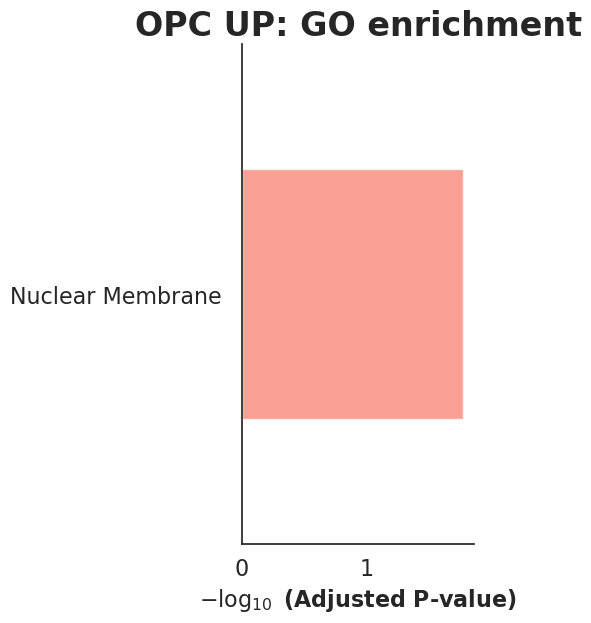

In [198]:
import gseapy as gp
import matplotlib.colors as mcolors
colors =["#88352b","#ebceb1","#eee9de","#929489","#576169"]
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
ct="OPC"
FC=0.25
# pvl = 0.05
cutoff =0.05
nb_genes = 1000

# pp = "padj" #"padj"
type_="go"
all_up = []
all_down=[]
for ct in celltypes:
    tmp = df_tot[(df_tot[pp]<=pval)&(df_tot["celltypes"] ==ct) 
                    &(df_tot.Test=="resistance")
                & (df_tot[lf]>=FC)].sort_values(lf, ascending=False).gene.tolist()[:nb_genes]
    background = df_tissue[df_tissue["celltypes"] ==ct][genes]
    background = background.loc[:, background.sum(0)>0].columns.tolist()
    # bacground=genes
    tmp_d = df_tot[(df_tot[pp]<=pval)&(df_tot["celltypes"] ==ct) 
                    &(df_tot.Test=="resistance")
                    & (df_tot[lf]<=-FC)].sort_values(lf).gene.tolist()[:nb_genes]
    print(len(tmp_d))
    
    # try:
    # print(ct)
    # tmp = dico_genes_up[ct].gene.tolist()#[:nb_genes]
    print(len(tmp))
    # tmp_d = dico_genes_down[ct].gene.tolist()#[:nb_genes]
    # print(len(tmp_d))
    if type_=="go":
     
        go_up = get_go(tmp, background, ct+ " UP", cutoff=cutoff)
        go_up = go_up[go_up["Adjusted P-value"]<=cutoff].sort_values("Adjusted P-value",ascending=True)
        go_up['Direction'] = ct
        

        go_down = get_go(tmp_d, background, ct+ " Down", cutoff=cutoff)
        go_down = go_down[go_down["Adjusted P-value"]<=cutoff].sort_values("Adjusted P-value",ascending=True)
        go_down['Direction'] = ct
    else:
       
        go_up = get_go(tmp, background, ct+ " Up", cutoff=cutoff,
                       dtbs = ['MSigDB_Hallmark_2020',
                                                       'KEGG_2021_Human','Reactome_2022', 
                                                       'WikiPathway_2023_Human'])
        go_up = go_up[go_up["Adjusted P-value"]<=cutoff].sort_values("Adjusted P-value",ascending=True)
        go_up['Direction'] = ct 
    
        go_down = get_go(tmp_d, background, ct+ " Down", cutoff=cutoff,
                           dtbs = ['MSigDB_Hallmark_2020',
                                                       'KEGG_2021_Human','Reactome_2022', 
                                                       'WikiPathway_2023_Human'])
        go_down = go_down[go_down["Adjusted P-value"]<=cutoff].sort_values("Adjusted P-value",ascending=True)
        go_down['Direction'] = ct 
    all_up.append(go_up.head(5))
    all_down.append(go_down.head(5))


In [193]:
all_up

[Empty DataFrame
 Columns: [Gene_set, Term, P-value, Adjusted P-value, Old P-value, Old adjusted P-value, Odds Ratio, Combined Score, Genes, database, Number of genes, Direction]
 Index: [],
 Empty DataFrame
 Columns: [Gene_set, Term, P-value, Adjusted P-value, Old P-value, Old adjusted P-value, Odds Ratio, Combined Score, Genes, database, Number of genes, Direction]
 Index: [],
 Empty DataFrame
 Columns: [Gene_set, Term, P-value, Adjusted P-value, Old P-value, Old adjusted P-value, Odds Ratio, Combined Score, Genes, database, Number of genes, Direction]
 Index: [],
 Empty DataFrame
 Columns: [Gene_set, Term, P-value, Adjusted P-value, Old P-value, Old adjusted P-value, Odds Ratio, Combined Score, Genes, database, Number of genes, Direction]
 Index: [],
 Empty DataFrame
 Columns: [Gene_set, Term, P-value, Adjusted P-value, Old P-value, Old adjusted P-value, Odds Ratio, Combined Score, Genes, database, Number of genes, Direction]
 Index: [],
 Empty DataFrame
 Columns: [Gene_set, Term, P

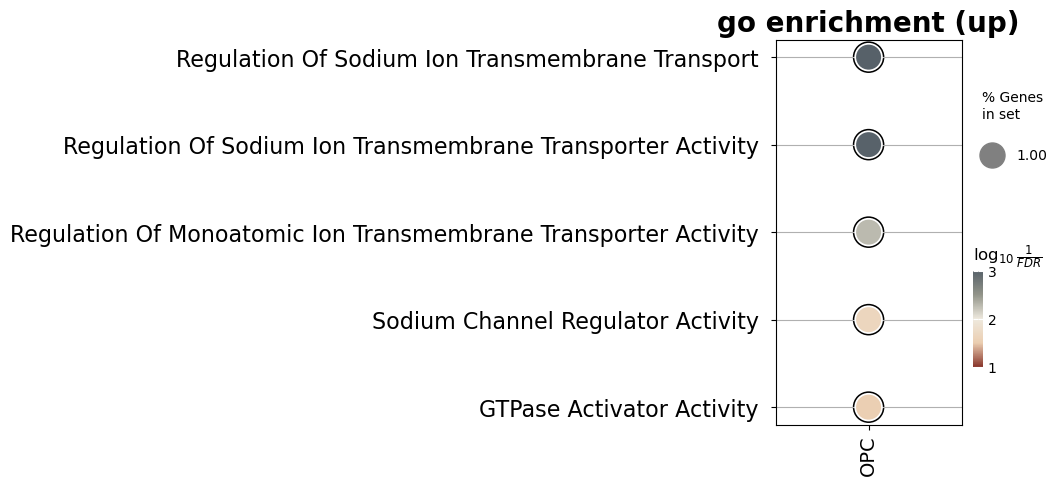

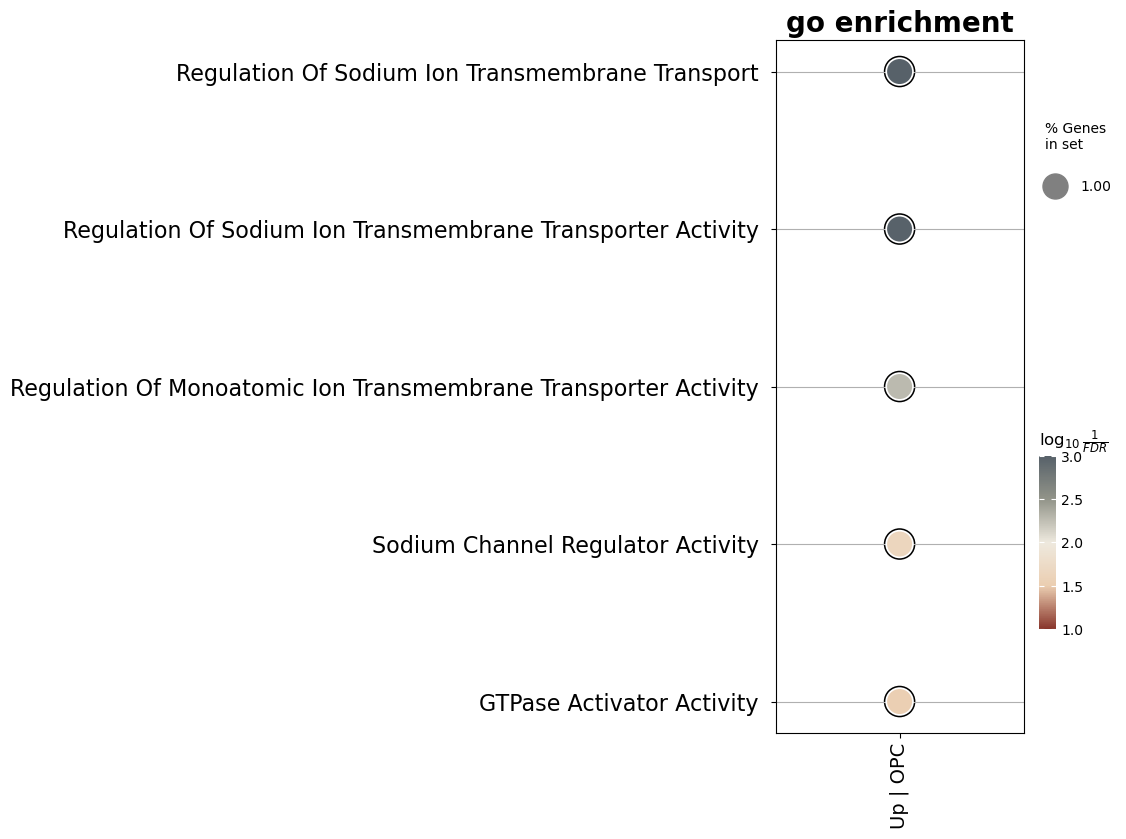

In [157]:
replacement = {}#"Histone Acetyltransferase Complex":"HAC", 
               # "Region Sequence-Specific DNA Binding":"RSS DNA Binding"}
import re
enr_res_up = pd.concat(all_up)
# print(enr_res_up)
name = type_#"booostrap_" + type_
enr_res_up["Number of genes"] = enr_res_up["Genes"].apply(lambda x: len(x.split(";")))
enr_res_up = enr_res_up[enr_res_up["Number of genes"] >1]
if len(enr_res_up[enr_res_up["Adjusted P-value"]<=cutoff])>0:
    c_order = [it for it in celltypes if it in enr_res_up.Direction.unique()]
    ax = gp.dotplot(enr_res_up,figsize=(3,5),
                    x='Direction',
                    x_order = c_order,
                    title=name + " enrichment (up)",
                    cmap = cmap,
                    size=3,
                    cutoff=cutoff,
                    show_ring=True)
    ytick = [it.get_text().split("(GO")[0].split("R-HSA")[0] for it in ax.get_yticklabels()]
    ax.set_yticklabels(ytick)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel("")
    plt.savefig("figures/%s_UP_resistance_ad_all.svg"%(name))
    plt.show()

enr_res_down = pd.concat(all_down)
enr_res_down["Number of genes"] = enr_res_down["Genes"].apply(lambda x: len(x.split(";")))
enr_res_down = enr_res_down[enr_res_down["Number of genes"] >1]
if len(enr_res_down[enr_res_down["Adjusted P-value"]<=cutoff])>0:
    c_order = [it for it in celltypes if it in enr_res_down.Direction.unique()]

    ax = gp.dotplot(enr_res_down,figsize=(3,4.5),
                    x='Direction',
                    x_order = c_order,
                    title=name + " enrichment (Down)",
                    cmap = cmap,
                    size=3,
                    cutoff=cutoff,
                    show_ring=True)
    ytick = [it.get_text().split("(GO")[0].split("R-HSA")[0] for it in ax.get_yticklabels()]
    ytick = [re.split("WP[0-9]",it)[0]for it in ytick]
    for k,v in replacement.items():
        ytick = [ it.replace(k,v) for it in ytick]
    ax.set_yticklabels(ytick)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel("")
    plt.savefig("figures/%s_DOWN_resistance_ad_all.svg"%(name))
    plt.show()
enr_res_down["Direction"] = "Down | " + enr_res_down["Direction"] 
enr_res_up["Direction"] = "Up | " + enr_res_up["Direction"] 
enr_ = pd.concat([enr_res_up,enr_res_down])
if len(enr_[enr_["Adjusted P-value"]<=cutoff])>0:
    # c_order = [it for it in celltypes if it in enr_.Direction.unique()]

    ax = gp.dotplot(enr_,figsize=(4,9),
                    x='Direction',
                    # x_order = c_order,
                    title=name + " enrichment",
                    cmap = cmap,
                    size=3,
                    cutoff=cutoff,
                    show_ring=True)
    ytick = [it.get_text().split("(GO")[0].split("R-HSA")[0] for it in ax.get_yticklabels()]
    ytick = [re.split("WP[0-9]",it)[0]for it in ytick]
    for k,v in replacement.items():
        ytick = [ it.replace(k,v) for it in ytick]
    ax.set_yticklabels(ytick)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel("")
    plt.savefig("figures/%s_BOTH_resistance_ad_all.svg"%(name))
    plt.show()

In [158]:
enr_res_up

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes,database,Number of genes,Direction
0,GO_Biological_Process_2023,Regulation Of Sodium Ion Transmembrane Transpo...,0.000004,0.000764,0,0,122.605042,1513.865623,UTRN;FGF12;YWHAH,GO_Biological_Process_2023,3,Up | OPC
1,GO_Biological_Process_2023,Regulation Of Sodium Ion Transmembrane Transpo...,0.000012,0.001022,0,0,85.770588,974.670802,UTRN;FGF12;YWHAH,GO_Biological_Process_2023,3,Up | OPC
2,GO_Biological_Process_2023,Regulation Of Monoatomic Ion Transmembrane Tra...,0.000090,0.005303,0,0,41.410816,385.592650,UTRN;FGF12;YWHAH,GO_Biological_Process_2023,3,Up | OPC
0,GO_Molecular_Function_2023,Sodium Channel Regulator Activity (GO:0017080),0.000755,0.022641,0,0,57.869048,416.031967,FGF12;YWHAH,GO_Molecular_Function_2023,2,Up | OPC
1,GO_Molecular_Function_2023,GTPase Activator Activity (GO:0005096),0.001965,0.029477,0,0,13.913211,86.709814,RALGAPB;ARAP2;TBC1D10A,GO_Molecular_Function_2023,3,Up | OPC


57
7
[Text(0, 0, 'Protein Kinase Inhibitor Activity (GO:0004860)'), Text(0, 1, 'Nuclear Androgen Receptor Binding (GO:0050681)')]


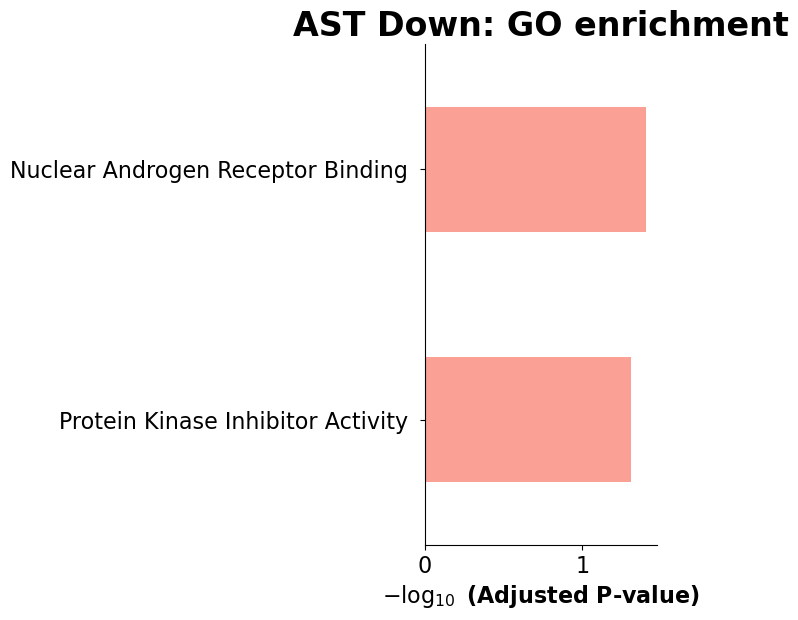

[Text(0, 0, 'Ribosome (GO:0005840)'), Text(0, 1, 'Cytoskeleton (GO:0005856)'), Text(0, 2, 'Focal Adhesion (GO:0005925)'), Text(0, 3, 'Cell-Substrate Junction (GO:0030055)'), Text(0, 4, 'Cytosolic Large Ribosomal Subunit (GO:0022625)'), Text(0, 5, 'Large Ribosomal Subunit (GO:0015934)')]


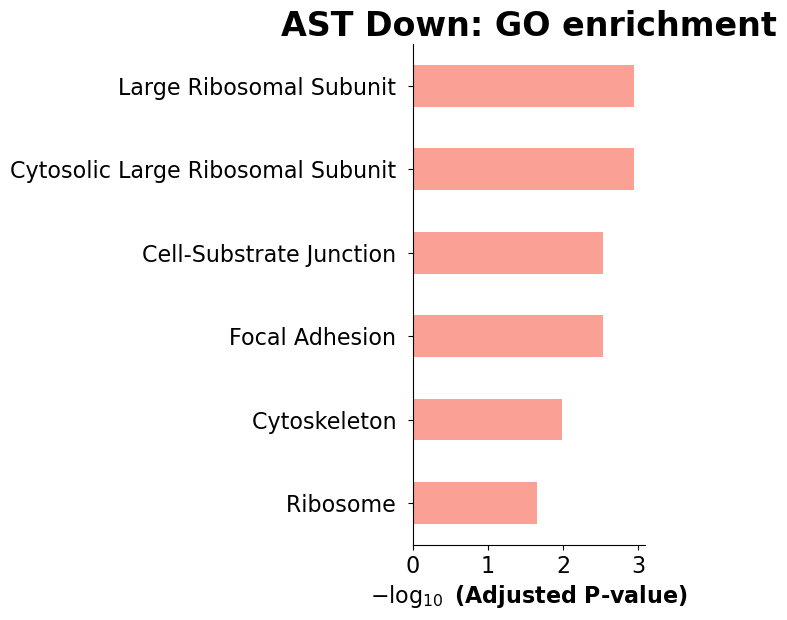

21
0
[Text(0, 0, 'Supramolecular Fiber Organization (GO:0097435)'), Text(0, 1, 'Positive Regulation Of MAPK Cascade (GO:0043410)'), Text(0, 2, 'Central Nervous System Development (GO:0007417)'), Text(0, 3, 'Positive Regulation Of JNK Cascade (GO:0046330)'), Text(0, 4, 'Positive Regulation Of Supramolecular Fiber Organization (GO:1902905)'), Text(0, 5, 'Positive Regulation Of Stress-Activated MAPK Cascade (GO:0032874)'), Text(0, 6, 'Regulation Of JNK Cascade (GO:0046328)'), Text(0, 7, 'Modulation Of Chemical Synaptic Transmission (GO:0050804)'), Text(0, 8, 'Positive Regulation Of ERK1 And ERK2 Cascade (GO:0070374)'), Text(0, 9, 'Regulation Of ERK1 And ERK2 Cascade (GO:0070372)')]


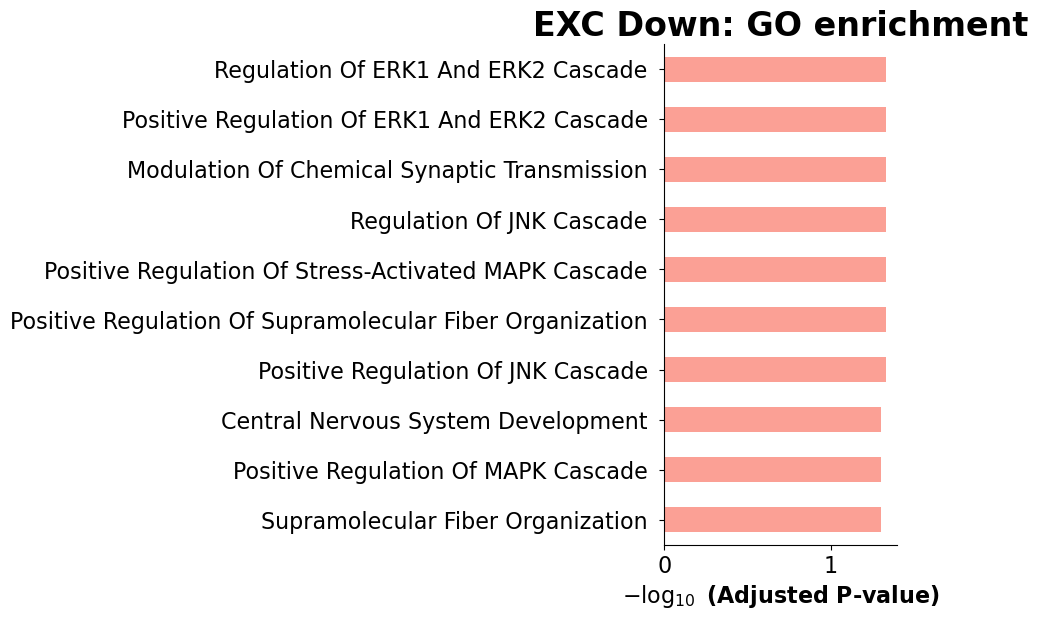

0
0
12
22
[Text(0, 0, 'Zinc Ion Binding (GO:0008270)'), Text(0, 1, 'Transition Metal Ion Binding (GO:0046914)')]


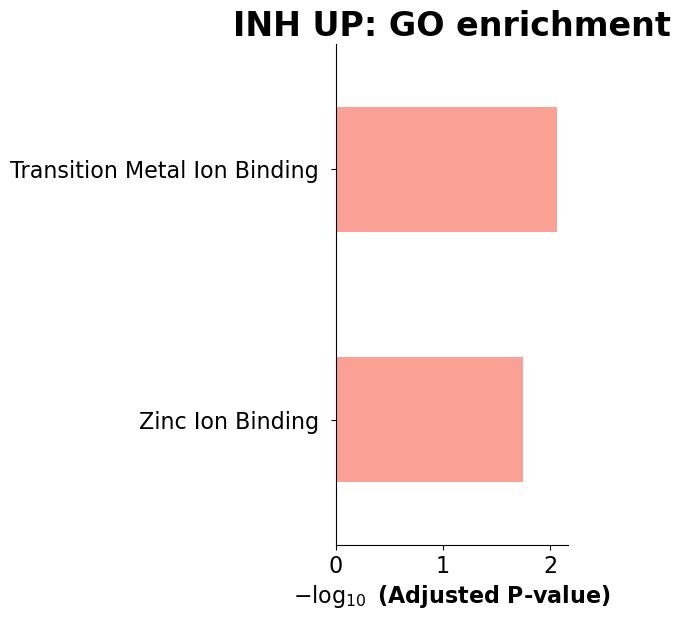

[Text(0, 0, 'Small-Subunit Processome (GO:0032040)'), Text(0, 1, 'Golgi Lumen (GO:0005796)'), Text(0, 2, 'Lysosomal Lumen (GO:0043202)'), Text(0, 3, 'Ribosome (GO:0005840)'), Text(0, 4, 'Vacuolar Lumen (GO:0005775)'), Text(0, 5, 'Cytosolic Small Ribosomal Subunit (GO:0022627)'), Text(0, 6, 'Small Ribosomal Subunit (GO:0015935)')]


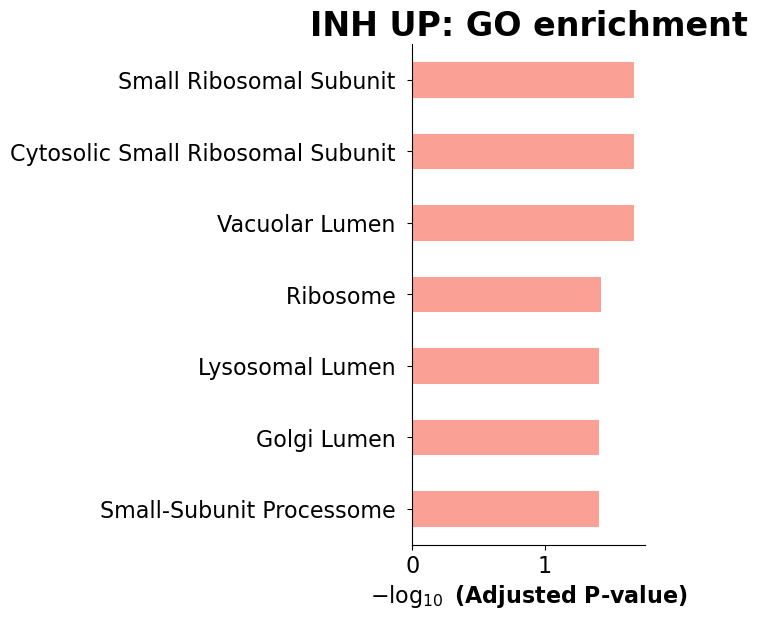

0
2
0
0
7
0


In [131]:
import gseapy as gp
import matplotlib.colors as mcolors
colors =["#88352b","#ebceb1","#eee9de","#929489","#576169"]
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
ct="OPC"
FC=0.0
# pvl = 0.05
cutoff =0.05
nb_genes = 500
# pp = "padj" #"padj"
type_="go"
all_up = []
all_down=[]
for ct in celltypes:
    tmp = df_tot[(df_tot[pp]<=pval)&(df_tot["celltypes"] ==ct) 
                    &(df_tot.Test=="AD")
                & (df_tot[lf]>=FC)].sort_values(lf, ascending=False).gene.tolist()[:nb_genes]
    background = df_tissue[df_tissue["celltypes"] ==ct][genes]
    background = background.loc[:, background.sum(0)>0].columns.tolist()
    bacground=genes
    tmp_d = df_tot[(df_tot[pp]<=pval)&(df_tot["celltypes"] ==ct) 
                    &(df_tot.Test=="AD")
                    & (df_tot[lf]<=-FC)].sort_values(lf).gene.tolist()[:nb_genes]
    print(len(tmp_d))
    
    # try:
    # print(ct)
    # tmp = dico_genes_up[ct].gene.tolist()#[:nb_genes]
    print(len(tmp))
    # tmp_d = dico_genes_down[ct].gene.tolist()#[:nb_genes]
    # print(len(tmp_d))
    if type_=="go":
     
        go_up = get_go(tmp, background, ct+ " UP", cutoff=cutoff)
        # print(go_up)

        go_up = go_up[go_up["Adjusted P-value"]<=cutoff].sort_values("Adjusted P-value",ascending=True)
        go_up['Direction'] = ct
    

        go_down = get_go(tmp_d, background, ct+ " Down", cutoff=cutoff)
        go_down = go_down[go_down["Adjusted P-value"]<=cutoff].sort_values("Adjusted P-value",ascending=True)
        go_down['Direction'] = ct
    else:
       
        go_up = get_go(tmp, background, ct+ " Up", cutoff=cutoff,
                       dtbs = ['MSigDB_Hallmark_2020',
                                                       'KEGG_2021_Human','Reactome_2022', 
                                                       'WikiPathway_2023_Human'])
        go_up = go_up[go_up["Adjusted P-value"]<=cutoff].sort_values("Adjusted P-value",ascending=True)
        go_up['Direction'] = ct 
    
        go_down = get_go(tmp_d, background, ct+ " Down", cutoff=cutoff,
                           dtbs = ['MSigDB_Hallmark_2020',
                                                       'KEGG_2021_Human','Reactome_2022', 
                                                       'WikiPathway_2023_Human'])
        go_down = go_down[go_down["Adjusted P-value"]<=cutoff].sort_values("Adjusted P-value",ascending=True)
        go_down['Direction'] = ct 
    all_up.append(go_up.head(10))
    all_down.append(go_down.head(10))


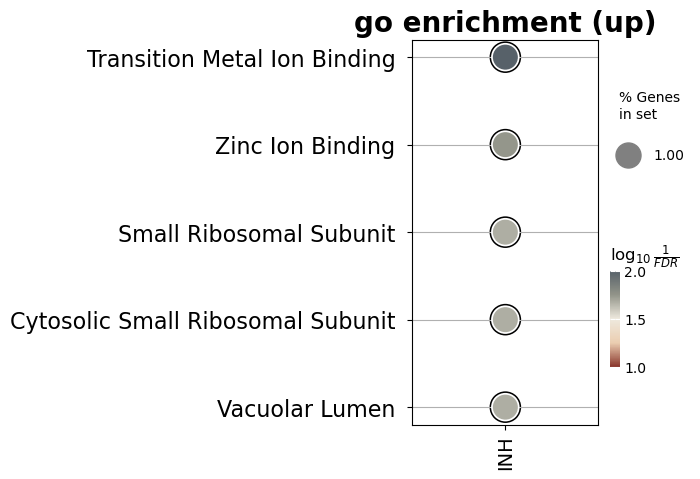

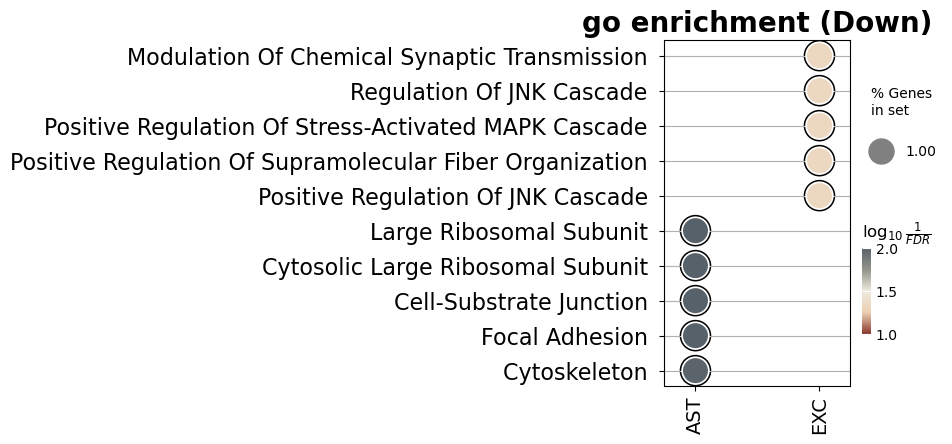

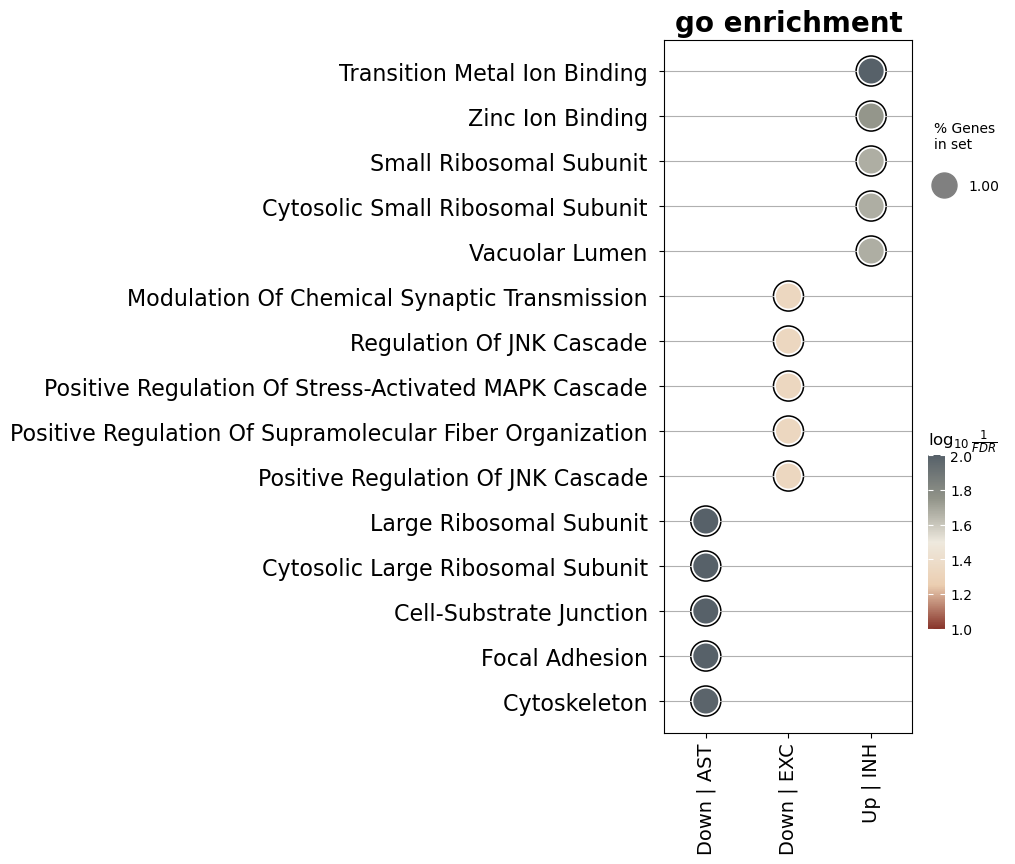

In [126]:
replacement = {}#"Histone Acetyltransferase Complex":"HAC", 
               # "Region Sequence-Specific DNA Binding":"RSS DNA Binding"}
import re
enr_res_up = pd.concat(all_up)
# print(enr_res_up)
name = type_#"booostrap_" + type_
enr_res_up["Number of genes"] = enr_res_up["Genes"].apply(lambda x: len(x.split(";")))
enr_res_up = enr_res_up[enr_res_up["Number of genes"] >1]
if len(enr_res_up[enr_res_up["Adjusted P-value"]<=cutoff])>0:
    c_order = [it for it in celltypes if it in enr_res_up.Direction.unique()]
    ax = gp.dotplot(enr_res_up,figsize=(3,5),
                    x='Direction',
                    x_order = c_order,
                    title=name + " enrichment (up)",
                    cmap = cmap,
                    size=3,
                    cutoff=cutoff,
                    show_ring=True)
    ytick = [it.get_text().split("(GO")[0].split("R-HSA")[0] for it in ax.get_yticklabels()]
    ax.set_yticklabels(ytick)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel("")
    plt.savefig("figures/%s_UP_resilience_ad_all.svg"%(name))
    plt.show()

enr_res_down = pd.concat(all_down)
enr_res_down["Number of genes"] = enr_res_down["Genes"].apply(lambda x: len(x.split(";")))
enr_res_down = enr_res_down[enr_res_down["Number of genes"] >1]
if len(enr_res_down[enr_res_down["Adjusted P-value"]<=cutoff])>0:
    c_order = [it for it in celltypes if it in enr_res_down.Direction.unique()]

    ax = gp.dotplot(enr_res_down,figsize=(3,4.5),
                    x='Direction',
                    x_order = c_order,
                    title=name + " enrichment (Down)",
                    cmap = cmap,
                    size=3,
                    cutoff=cutoff,
                    show_ring=True)
    ytick = [it.get_text().split("(GO")[0].split("R-HSA")[0] for it in ax.get_yticklabels()]
    ytick = [re.split("WP[0-9]",it)[0]for it in ytick]
    for k,v in replacement.items():
        ytick = [ it.replace(k,v) for it in ytick]
    ax.set_yticklabels(ytick)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel("")
    plt.savefig("figures/%s_DOWN_resilience_ad_all.svg"%(name))
    plt.show()
enr_res_down["Direction"] = "Down | " + enr_res_down["Direction"] 
enr_res_up["Direction"] = "Up | " + enr_res_up["Direction"] 
enr_ = pd.concat([enr_res_up,enr_res_down])
if len(enr_[enr_["Adjusted P-value"]<=cutoff])>0:
    # c_order = [it for it in celltypes if it in enr_.Direction.unique()]

    ax = gp.dotplot(enr_,figsize=(4,9),
                    x='Direction',
                    # x_order = c_order,
                    title=name + " enrichment",
                    cmap = cmap,
                    size=3,
                    cutoff=cutoff,
                    show_ring=True)
    ytick = [it.get_text().split("(GO")[0].split("R-HSA")[0] for it in ax.get_yticklabels()]
    ytick = [re.split("WP[0-9]",it)[0]for it in ytick]
    for k,v in replacement.items():
        ytick = [ it.replace(k,v) for it in ytick]
    ax.set_yticklabels(ytick)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel("")
    plt.savefig("figures/%s_BOTH_resilience_ad_all.svg"%(name))
    plt.show()

['C6orf132', 'FLOT2', 'UNC5B', 'PITPNM3', 'GTDC1', 'SLC7A5']
[Text(0, 0, 'Regulation Of Gene Expression (GO:0010468)'), Text(0, 1, 'Negative Regulation Of Gene Expression (GO:0010629)'), Text(0, 2, 'Negative Regulation Of Macromolecule Metabolic Process (GO:0010605)')]


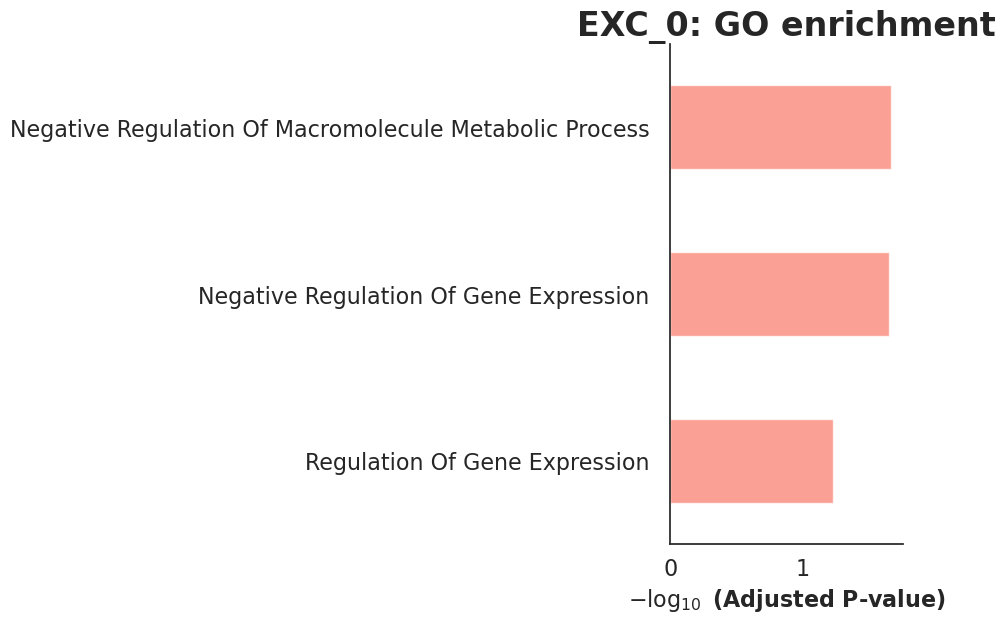

[Text(0, 0, 'Intracellular Membrane-Bounded Organelle (GO:0043231)'), Text(0, 1, 'Basolateral Plasma Membrane (GO:0016323)')]


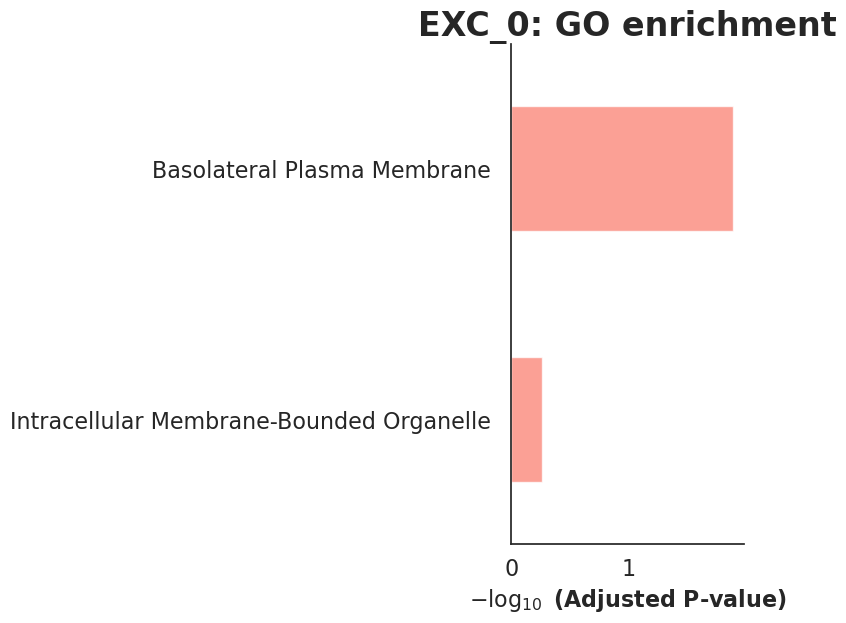

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes,database,Number of genes
1,GO_Biological_Process_2023,Negative Regulation Of Macromolecule Metabolic...,0.001670,0.021290,0,0,46.657051,298.380294,SLC7A5;FLOT2,GO_Biological_Process_2023,2
14,GO_Biological_Process_2023,Negative Regulation Of Gene Expression (GO:001...,0.005396,0.022378,0,0,25.312281,132.182329,SLC7A5;FLOT2,GO_Biological_Process_2023,2
54,GO_Biological_Process_2023,Regulation Of Gene Expression (GO:0010468),0.047803,0.059102,0,0,7.664817,23.306179,SLC7A5;FLOT2,GO_Biological_Process_2023,2
0,GO_Cellular_Component_2023,Basolateral Plasma Membrane (GO:0016323),0.001546,0.012899,0,0,48.543333,314.161294,SLC7A5;FLOT2,GO_Cellular_Component_2023,2
18,GO_Cellular_Component_2023,Intracellular Membrane-Bounded Organelle (GO:0...,0.545223,0.545223,0,0,1.259087,0.763712,SLC7A5;FLOT2,GO_Cellular_Component_2023,2


In [372]:
tt = mat_ad.obs[mat_ad.obs.leiden=="2"].Genes.tolist()
print(tt)
get_go(tt, genes, ct="EXC_0", cutoff=1)


In [326]:
reducer_name = "umap"

embedding = pd.DataFrame(mat_ad.obsm["X_%s"%reducer_name],
                            index=mat.index,
                            columns=[reducer_name+"1",
                                    reducer_name+"2"])
embedding["leiden"] = mat_ad.obs["leiden"].values
mat = mat.stack().reset_index()
mat_pvalue = mat_pvalue.stack().reset_index()


from statsmodels.stats.multitest import fdrcorrection
mat.columns = ["from","to", method]
mat_pvalue.columns = ["from","to", "pval_corr"]

mat =  mat.merge(mat_pvalue, on=["from","to"], how="outer")
# mat["from_type"] = mat["from"].str.split("|",expand=True)[0]
# mat["to_type"] = mat["to"].str.split("|",expand=True)[0]
# mat["from_label"] = mat["from"].str.split("|",expand=True)[1]
# mat["to_label"] = mat["to"].str.split("|",expand=True)[1]
mat["abs_spearman"] = np.abs(mat["spearman"].values)
mat
_, mat["qval_corr"] = fdrcorrection(mat["pval_corr"].values, is_sorted=False)
mat = mat[mat["from"] != mat["to"]]
q_95 = mat["abs_spearman"].quantile(0.95)
q_99 = mat["abs_spearman"].quantile(0.99)

print(q_95)#0.37
print(q_99)#0.57
 
list_nodes = np.unique(mat["from"].unique().tolist() + mat["to"].unique().tolist()).tolist()
# hh = np.unique([it.split("|")[1] for it in list_nodes]).tolist()
# len(hh)

0.7550236463632948
0.8576219413040542


In [327]:
embedding = embedding.join(exc_resi_resist)
embedding.head(5)

,umap1,umap2,leiden,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene,padj_fdr,celltypes,Test,Tissue,Ref,iteration
C6orf132,-2.638173,4.470476,2,174.807086,11.147747,2.653690,4.200848,2.659176e-05,0.004693,C6orf132,0.006435,EXC,resistance,All,resilience,0
NRGN,-1.340272,4.712357,4,2207.775418,10.478658,2.075102,5.049708,4.424850e-07,0.000312,NRGN,0.000428,EXC,resistance,All,resilience,0
PRKAR1B,0.947764,6.927902,8,88.387072,8.933051,2.161314,4.133158,3.578128e-05,0.005052,PRKAR1B,0.006927,EXC,resistance,All,resilience,0
RAB11FIP4,-0.962454,2.243347,1,41.344891,8.660497,2.263742,3.825744,1.303777e-04,0.015341,RAB11FIP4,0.021034,EXC,resistance,All,resilience,0
FLOT2,-2.902454,2.879562,2,19.383266,7.699959,2.422976,3.177893,1.483495e-03,0.034912,FLOT2,0.047867,EXC,resistance,All,resilience,0


In [328]:
mat.head(5)

,from,to,spearman,pval_corr,abs_spearman,qval_corr
1,ACTB,ADTRP,0.817287,1.188810e-09,0.817287,5.825171e-08
2,ACTB,ALMS1,0.837076,1.991223e-10,0.837076,1.300933e-08
3,ACTB,ANP32B,0.694661,2.598995e-06,0.694661,2.469833e-05
4,ACTB,ASPH,0.258496,1.279476e-01,0.258496,1.716183e-01
5,ACTB,BST1,0.356237,3.296541e-02,0.356237,5.367577e-02


In [329]:
mat = mat.merge(embedding, right_on="gene", left_on="from", how="left")
mat

,from,to,spearman,pval_corr,abs_spearman,qval_corr,umap1,umap2,leiden,baseMean,...,stat,pvalue,padj,gene,padj_fdr,celltypes,Test,Tissue,Ref,iteration
0,ACTB,ADTRP,0.817287,1.188810e-09,0.817287,5.825171e-08,-4.661381,6.577633,3,1200.564272,...,3.459230,0.000542,0.024678,ACTB,0.033837,EXC,resistance,All,resilience,0
1,ACTB,ALMS1,0.837076,1.991223e-10,0.837076,1.300933e-08,-4.661381,6.577633,3,1200.564272,...,3.459230,0.000542,0.024678,ACTB,0.033837,EXC,resistance,All,resilience,0
2,ACTB,ANP32B,0.694661,2.598995e-06,0.694661,2.469833e-05,-4.661381,6.577633,3,1200.564272,...,3.459230,0.000542,0.024678,ACTB,0.033837,EXC,resistance,All,resilience,0
3,ACTB,ASPH,0.258496,1.279476e-01,0.258496,1.716183e-01,-4.661381,6.577633,3,1200.564272,...,3.459230,0.000542,0.024678,ACTB,0.033837,EXC,resistance,All,resilience,0
4,ACTB,BST1,0.356237,3.296541e-02,0.356237,5.367577e-02,-4.661381,6.577633,3,1200.564272,...,3.459230,0.000542,0.024678,ACTB,0.033837,EXC,resistance,All,resilience,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,ZNF665,UBE2Q1,0.289869,8.636950e-02,0.289869,1.212421e-01,-0.170018,5.622446,4,211.834764,...,4.251504,0.000021,0.004693,ZNF665,0.006435,EXC,resistance,All,resilience,0
3076,ZNF665,UNC5B,0.740750,2.396852e-07,0.740750,3.834963e-06,-0.170018,5.622446,4,211.834764,...,4.251504,0.000021,0.004693,ZNF665,0.006435,EXC,resistance,All,resilience,0
3077,ZNF665,USP14,-0.024200,8.885854e-01,0.024200,9.282491e-01,-0.170018,5.622446,4,211.834764,...,4.251504,0.000021,0.004693,ZNF665,0.006435,EXC,resistance,All,resilience,0
3078,ZNF665,ZAP70,0.205529,2.291529e-01,0.205529,2.869902e-01,-0.170018,5.622446,4,211.834764,...,4.251504,0.000021,0.004693,ZNF665,0.006435,EXC,resistance,All,resilience,0


0.5473097387675493


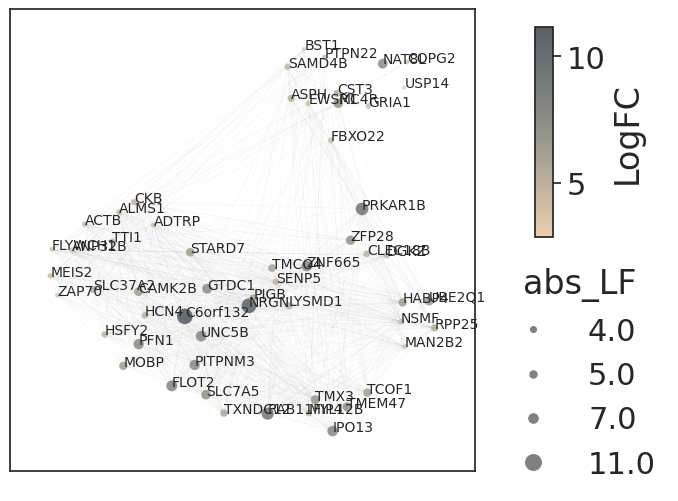

In [335]:
thrs = 0#mat["abs_spearman"].quantile(0.8)#0.5
import matplotlib as mpl
import matplotlib.cm as cm
import networkx as nx
from network import nx_plot 
palette= {"DOWN": "#F6E8C3", "UP":"#003C30"}
mat["abs_spearman"] =mat["abs_spearman"].astype(float)
embedding["abs_LF"] = np.abs(embedding["log2FoldChange"])
list_nodes = embedding["gene"].tolist()
# print(list_nodes)

list_colors_nodes = embedding["log2FoldChange"].astype(float).tolist()

size_name = "abs_LF"#"-log10(qvals)"
if size_name =="-log10(qvals)":
    list_size_nodes = ((embedding[size_name].astype(float))*2)**2
elif size_name =="abs_LF":
    list_size_nodes = ((embedding[size_name].astype(float)))**2
cmap_node = mpl.colors.LinearSegmentedColormap.from_list("mycolor", [ "#ebceb1","#929489","#576169"])
plt.register_cmap('myc4', cmap_node)


colors =["#88352b","#ebceb1","#eee9de","#929489","#576169"]
# cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

nodes_pos = {nod : (embedding.loc[embedding["gene"] == nod, reducer_name + "1"].values[0],
                    embedding.loc[embedding["gene"] ==nod, reducer_name + "2"].values[0]) for nod in list_nodes}

mat_filt = mat[mat["qval_corr"]<= 0.05]
mat_filt = mat_filt[mat_filt["abs_spearman"]>= thrs]
min_coeff = np.abs(mat_filt["spearman"]).min()
q_coeff = np.abs(mat_filt["spearman"]).quantile(0.5)
print(q_coeff)
max_coeff = np.abs(mat_filt["spearman"]).max()
edges = [(it["from"], it["to"], {"weight":it["abs_spearman"]}) for _, it in mat_filt.iterrows()]
edges_width = np.asarray([(it["abs_spearman"]**2)/2 for _, it in mat_filt.iterrows()])

norm = mpl.colors.Normalize(vmin=-2, vmax=2)
cmap = mpl.colormaps["Greys"]
m = cm.ScalarMappable(norm=norm, cmap=cmap)
edges_color = np.asarray([m.to_rgba(it["abs_spearman"]) for _, it in mat_filt.iterrows()])

# nn_int_mat = mat[mat["from_type"]!=mat["to_type"]]
mapping_label = {it:it if lb>=2 else "" for it,lb in zip(embedding["gene"].values,embedding[size_name].values) }

# mapping_label = {it: if it in l_sig else "" for it,lb in zip(list_nodes,labl2) }
cmap_c = "myc4"
fig, ax = plt.subplots(figsize=(6, 6))
g = nx_plot(nodes=list_nodes,ax=ax,
            edges=edges,
            nodes_pos=nodes_pos,
             nodes_labels=mapping_label,
            nodes_labels_args={"font_size":10},
                                #"font_family":"cursive"},
            nodes_args={
                      "node_color":list_colors_nodes,
                       # "node_shape":list_shape_nodes,
                        "cmap":cmap_c,
                        "linewidths":0.1,
                        "node_size":list_size_nodes, 
                        "alpha":0.9},
            edges_args={"width":edges_width,
                        "edge_color":edges_color,
                        "alpha":0.1,
                        "edge_vmin":0.5,
                        "edge_vmax":1,
                        "edge_cmap":"Greys"}
            )
#n
# ll = []
# for kc, cc in nodes_colors_map.items():
#         blue_line = mpl.lines.Line2D([], [], color=cc,
#                                     label = kc, 
#                                     marker="o",
#                                     linestyle='None',
#                                       markersize=8, alpha=0.7)
# #                                      label=kc + "|"+ks)
#         ll.append(blue_line)

# scat =plt.scatter([],[],cmap="BrBG", vmin=np.min(list_colors_nodes), vmax=np.max(list_colors_nodes))
# fig.colorbar(scat,
#              cmap="BrBG",
#              anchor=(0, 0),
#              ax=ax, 
#              shrink=.2, 
#              vmin=np.min(list_colors_nodes), vmax=np.max(list_colors_nodes),
#              label='LogFC', 
#              aspect=8, 
#              use_gridspec=True,
#              location='right'
#             )




def funct(s):
    to_ret=np.zeros(len(s))
    for idx, el in enumerate(s):
        if el==5:
            to_ret[idx] = 1
        else:
            to_ret[idx] = np.exp(np.log(10)*(-np.sqrt(el)/15))
    return to_ret

# kw = dict(prop="sizes", num=[1, .1, 0.05, 0.01], color='gray',
#           func=funct)

# kw = dict(prop="sizes", num=[0, -np.log(0.05), -np.log(0.01), -np.log(0.001)], color='gray', fmt="{x:.2f}",
#            func=lambda s: np.sqrt(s)/5)

# g.legend(*scatter.legend_elements(**kw),title="Qvalue",labelspacing=2, loc='lower right', frameon=False)
if size_name =="-log10(qvals)":
    for n in [ -np.log(0.05), -np.log(0.01), -np.log(0.001)]:
        plt.plot([], [], 'grey', marker="o", markersize = np.sqrt((n*2)**2), label = f"{np.round(n,2)}", linewidth=0)
elif size_name == "abs_LF":
    for n in [embedding[size_name].quantile(0.25),
              embedding[size_name].quantile(0.5),
              embedding[size_name].quantile(0.75),
              embedding[size_name].quantile(1)] :
        plt.plot([], [], 'grey', marker="o", markersize = np.sqrt((n)**2), label = f"{np.round(n,0)}", linewidth=0)
    
plt.legend( bbox_to_anchor=(1, 0.5), frameon = False, title=size_name)


jet = plt.get_cmap(cmap_c)
cNorm  = mpl.colors.Normalize(vmin=min(list_colors_nodes), vmax=max(list_colors_nodes))
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=jet)
cax = fig.add_axes([1, 0.5, 0.03, 0.35])
plt.colorbar(scalarMap, cax = cax,#ticks=[range(int(np.round(min(list_colors_nodes),0)), int(np.round(max(list_colors_nodes),0)), 10)],
             orientation='vertical', label="LogFC")
# plt.legend(handles=ll, bbox_to_anchor=(1.1, 0.80))
plt.savefig("figures/CorrGraph_lFC_EXC" + ".svg", bbox_inches="tight")
plt.show()